In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install kagglehub

In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [9]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [11]:
df.sort_values(by='TotalPrice').head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60,4,12
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,1,1
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00,4,6
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46,0,12
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02,2,1


In [12]:
# 음수 TotalPrice 확인
print(f"TotalPrice <= 0: {(df['TotalPrice'] <= 0).sum()}개")
print(f"Quantity < 0: {(df['Quantity'] < 0).sum()}개")

TotalPrice <= 0: 11805개
Quantity < 0: 10624개


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

Basic Data Information
Total data size: (541909, 11)

Missing values:
InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
TotalPrice           0
DayOfWeek            0
InvoiceMonth         0
dtype: int64

TotalPrice statistics:
count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

Data size after cleaning: (530104, 11)

Population Statistics
Population size: 530,104
Population mean: 20.12
Population std: 270.36
Population median: 9.90

Sample Statistics
Sample size: 1,000
Sample mean: 19.98
Sample std: 54.49
Sample median: 9.90

Population vs Sample Comparison
Mean difference: 0.14
Mean difference ratio: 0.71%
Std difference: 215.87
Standard Error (SE): 8.55

Running Central Limit Theorem simula

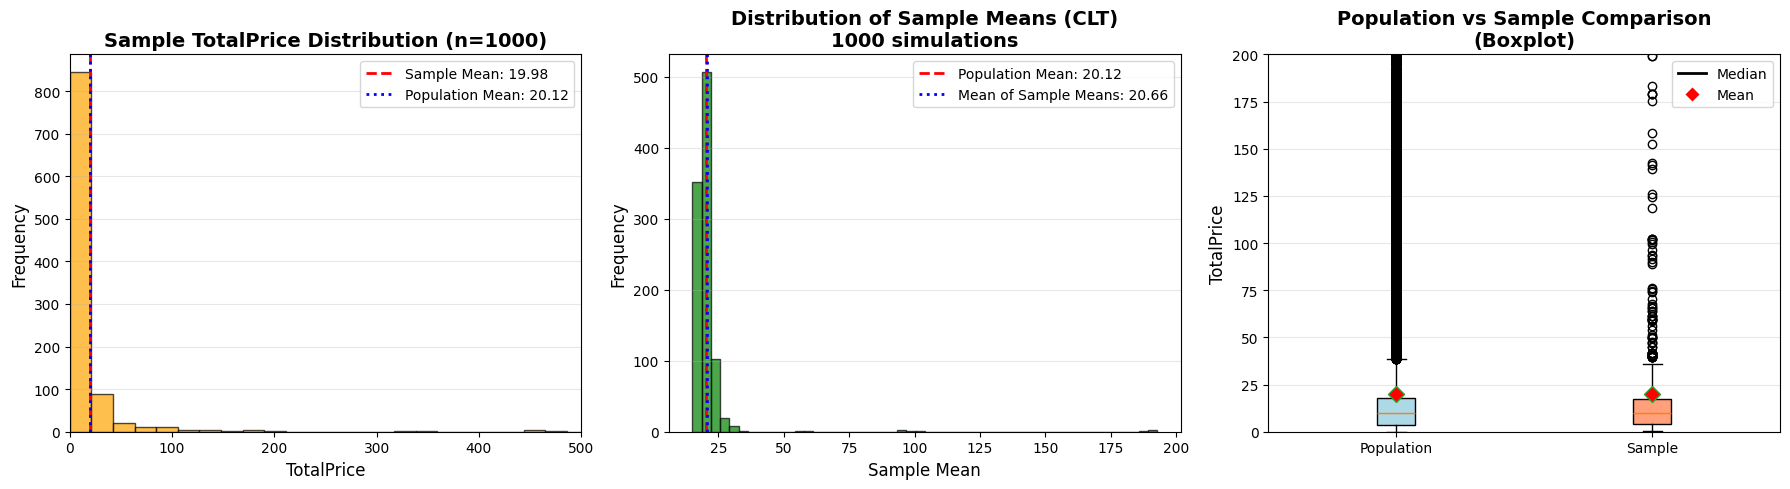


Central Limit Theorem Analysis
Mean of sample means: 20.66
Std of sample means: 11.26
Theoretical standard error: 8.55

Interpretation
1. The mean of sample means (20.66) is very close to
   the population mean (20.12).
   Difference: 0.54

2. The std of sample means (11.26) is similar to
   the theoretical SE (8.55).
   This confirms SE = σ/√n formula.

3. According to Central Limit Theorem:
   - Original data: Highly right-skewed distribution
   - Sample means: Approximately normal distribution
   - With sufficient sample size (n=1000), the distribution of
     sample means approximates a normal distribution.

4. This proves that a single sample mean can reliably represent
   the population, even when the original data is not normally distributed.

Summary Statistics Table
 Metric Population  Sample   Difference
   Size    530,104   1,000            -
   Mean      20.12   19.98 0.14 (0.71%)
Std Dev     270.36   54.49       215.87
 Median       9.90    9.90         0.00
    Min      

In [13]:
# 문제 1: 모집단과 표본 집단의 TotalPrice 비교

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1-1. 데이터 기본 확인
print("=" * 50)
print("Basic Data Information")
print("=" * 50)
print(f"Total data size: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nTotalPrice statistics:\n{df['TotalPrice'].describe()}")

# 1-2. 결측치, 이상치 제거 (음수 가격이나 수량 제거)
# 결측치 제거 및 수정 없음: 현재 분석 목적에 영향이 없음 (RFM 분석 시에는 결측치 확인 및 정리 필요)
# 이상치 제거TotalPrice가 0 이하인 데이터는 분석에서 제외: 실제 판매 거래가 아니거나 반품 데이터일 수 있기 때문
df_clean = df[(df['TotalPrice'] > 0) & (df['Quantity'] > 0)].copy()
print(f"\nData size after cleaning: {df_clean.shape}")

# 1-3. 모집단(전체 데이터) 통계량 계산
population_mean = df_clean['TotalPrice'].mean()
population_std = df_clean['TotalPrice'].std(ddof=0)  # 모집단 표준편차 (ddof=0)
population_size = len(df_clean)

print("\n" + "=" * 50)
print("Population Statistics")
print("=" * 50)
print(f"Population size: {population_size:,}")
print(f"Population mean: {population_mean:.2f}")
print(f"Population std: {population_std:.2f}")
print(f"Population median: {df_clean['TotalPrice'].median():.2f}")

# 1-4. 무작위 표본 추출 (1000개)
# random_state를 설정하여 재현 가능하도록 함
np.random.seed(42)
sample_df = df_clean.sample(n=1000, random_state=42)

# 1-5. 표본 통계량 계산
sample_mean = sample_df['TotalPrice'].mean()
sample_std = sample_df['TotalPrice'].std(ddof=1)  # 표본 표준편차 (ddof=1)
sample_size = len(sample_df)

print("\n" + "=" * 50)
print("Sample Statistics")
print("=" * 50)
print(f"Sample size: {sample_size:,}")
print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample std: {sample_std:.2f}")
print(f"Sample median: {sample_df['TotalPrice'].median():.2f}")

# 1-6. 차이 계산 및 표준오차
mean_difference = abs(sample_mean - population_mean)
standard_error = population_std / np.sqrt(sample_size)  # 표준오차

print("\n" + "=" * 50)
print("Population vs Sample Comparison")
print("=" * 50)
print(f"Mean difference: {mean_difference:.2f}")
print(f"Mean difference ratio: {(mean_difference/population_mean)*100:.2f}%")
print(f"Std difference: {abs(sample_std - population_std):.2f}")
print(f"Standard Error (SE): {standard_error:.2f}")

# 1-7. 중심극한정리 검증 - 여러 표본의 평균 분포 확인
# 1000개 샘플을 1000번 추출하여 표본평균의 분포를 확인
n_simulations = 1000
sample_means = []

print("\nRunning Central Limit Theorem simulation...")
for i in range(n_simulations):
    sample = df_clean['TotalPrice'].sample(n=1000, random_state=i)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

# 1-8. 시각화 (3개 그래프)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ===== 그래프 1: 표본 분포 =====
axes[0].hist(sample_df['TotalPrice'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0].axvline(sample_mean, color='red', linestyle='--', linewidth=2,
                label=f'Sample Mean: {sample_mean:.2f}')
axes[0].axvline(population_mean, color='blue', linestyle=':', linewidth=2,
                label=f'Population Mean: {population_mean:.2f}')
axes[0].set_xlabel('TotalPrice', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Sample TotalPrice Distribution (n=1000)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].set_xlim(0, 500)
axes[0].grid(axis='y', alpha=0.3)

# ===== 그래프 2: 표본평균들의 분포 (중심극한정리) =====
axes[1].hist(sample_means, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(population_mean, color='red', linestyle='--', linewidth=2,
                label=f'Population Mean: {population_mean:.2f}')
axes[1].axvline(sample_means.mean(), color='blue', linestyle=':', linewidth=2,
                label=f'Mean of Sample Means: {sample_means.mean():.2f}')
axes[1].set_xlabel('Sample Mean', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Sample Means (CLT)\n1000 simulations',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

# ===== 그래프 3: 박스플롯 비교 =====
data_for_box = [df_clean['TotalPrice'], sample_df['TotalPrice']]
bp = axes[2].boxplot(data_for_box, tick_labels=['Population', 'Sample'],
                     patch_artist=True, showmeans=True)
# 박스 색상 설정
for patch, color in zip(bp['boxes'], ['lightblue', 'lightsalmon']):
    patch.set_facecolor(color)
# 평균 마커 스타일 설정
for mean in bp['means']:
    mean.set_marker('D')
    mean.set_markerfacecolor('red')
    mean.set_markersize(8)
axes[2].set_ylabel('TotalPrice', fontsize=12)
axes[2].set_title('Population vs Sample Comparison\n(Boxplot)',
                  fontsize=14, fontweight='bold')
axes[2].set_ylim(0, 200)
axes[2].grid(axis='y', alpha=0.3)

# 레전드 추가 (박스플롯)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', linewidth=2, label='Median'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='red',
           markersize=8, label='Mean')
]
axes[2].legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.show()

# 1-9. 중심극한정리에 대한 분석
print("\n" + "=" * 50)
print("Central Limit Theorem Analysis")
print("=" * 50)
print(f"Mean of sample means: {sample_means.mean():.2f}")
print(f"Std of sample means: {sample_means.std():.2f}")
print(f"Theoretical standard error: {standard_error:.2f}")

print(f"\n" + "=" * 50)
print("Interpretation")
print("=" * 50)
print(f"1. The mean of sample means ({sample_means.mean():.2f}) is very close to")
print(f"   the population mean ({population_mean:.2f}).")
print(f"   Difference: {abs(sample_means.mean() - population_mean):.2f}")
print(f"\n2. The std of sample means ({sample_means.std():.2f}) is similar to")
print(f"   the theoretical SE ({standard_error:.2f}).")
print(f"   This confirms SE = σ/√n formula.")
print(f"\n3. According to Central Limit Theorem:")
print(f"   - Original data: Highly right-skewed distribution")
print(f"   - Sample means: Approximately normal distribution")
print(f"   - With sufficient sample size (n=1000), the distribution of")
print(f"     sample means approximates a normal distribution.")
print(f"\n4. This proves that a single sample mean can reliably represent")
print(f"   the population, even when the original data is not normally distributed.")

print("\n" + "=" * 50)
print("Summary Statistics Table")
print("=" * 50)
summary_table = pd.DataFrame({
    'Metric': ['Size', 'Mean', 'Std Dev', 'Median', 'Min', 'Max'],
    'Population': [
        f'{population_size:,}',
        f'{population_mean:.2f}',
        f'{population_std:.2f}',
        f'{df_clean["TotalPrice"].median():.2f}',
        f'{df_clean["TotalPrice"].min():.2f}',
        f'{df_clean["TotalPrice"].max():.2f}'
    ],
    'Sample': [
        f'{sample_size:,}',
        f'{sample_mean:.2f}',
        f'{sample_std:.2f}',
        f'{sample_df["TotalPrice"].median():.2f}',
        f'{sample_df["TotalPrice"].min():.2f}',
        f'{sample_df["TotalPrice"].max():.2f}'
    ],
    'Difference': [
        '-',
        f'{mean_difference:.2f} ({mean_difference/population_mean*100:.2f}%)',
        f'{abs(sample_std - population_std):.2f}',
        f'{abs(df_clean["TotalPrice"].median() - sample_df["TotalPrice"].median()):.2f}',
        '-',
        '-'
    ]
})
print(summary_table.to_string(index=False))

print("\n✅ Analysis Complete!")

 모집단과 표본 집단의 TotalPrice를 비교

1. Mean difference (평균 차이): 0.14 -> 모집단 평균과 표본 평균의 차이가 0.14 로 표본이 모집단을 잘 대표하고 있음.

2. Mean difference ratio (평균 차이 비율): 0.71% -> 평균 차이를 모집단 평균 대비 비율로 나타낸 값, 0.71%면 차이가 1%도 안 돼서, 표본과 모집단 평균이 거의 일치함

3. Std difference (표준편차 차이): 215.87 -> 모집단 표준편차와 표본 표준편차의 차이를 나타낸 값으로 215.87이면, 표본의 분산이 모집단과 비교해서 다를 수 있음. 스케일의 차이를 고려해야함

4. Standard Error (SE, 표준 오차): 8.55 -> 표본 평균이 모집단 평균을 추정할 때 오차 범위, 값이 작을수록 표본 평균이 모집단 평균에 가까워질 가능성이 높음.표준편차 차이가 크지만, 표준 오차(SE)가 작으니 평균 추정에는 큰 문제가 없음

5. 그래프 1 설명
추출된 1000개 표본의 평균(19.98)은 전체 모집단의 평균(20.12)과 0.7% 차이만 보이며, 분포의 우편향 패턴 역시 동일하게 나타났고, 이는 무작위 표본 추출이 잘 되었음

6. 그래프 2 설명
1000번의 표본 추출 시뮬레이션 결과, 표본평균들의 분포는 정규분포에 가까운 종 모양을 나타냈다. 이는 중심극한정리(Central Limit Theorem)가 실제로 작동함을 증명하며, 표본평균의 평균(20.66)이 모평균(20.12)에 수렴하는 것을 확임함

7. 그래프 3 설명
박스플롯을 통한 비교 결과, 모집단과 표본의 중앙값(10), Q1(3), Q3(18)가 거의 동일하며, 이상치의 패턴 또한 유사하게 나타남. 이는 표본이 모집단의 분산 특성까지 정확하게 반영하고 있음을 확인가능

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

Problem 2: Independent Two-Sample t-Test
Comparing TotalPrice means between top two countries

Step 1: Identify Top Countries by Order Count

Top 10 countries by order count:
Country
United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1966
Portugal            1501
Australia           1182
Name: count, dtype: int64

Top 2 Countries Selected
Rank 1: United Kingdom
  - Order count: 485,123
  - Percentage: 91.51%

Rank 2: Germany
  - Order count: 9,040
  - Percentage: 1.71%

Step 2: Descriptive Statistics

Statistic United Kingdom Germany
    Count        485,123   9,040
     Mean          18.60   25.32
  Std Dev         281.28   35.46
   Median           8.42   17.00
      Min           0.00    0.39
      Max      168469.60  876.00
 Q1 (25%)           3.36   12.75
 Q3 (75%)          16.95   23.40

Mean difference (United Kingdom - Germany): -6.71



/tmp/ipython-input-3128569992.py:267: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot(data_for_box, labels=[top_country_1, top_country_2],


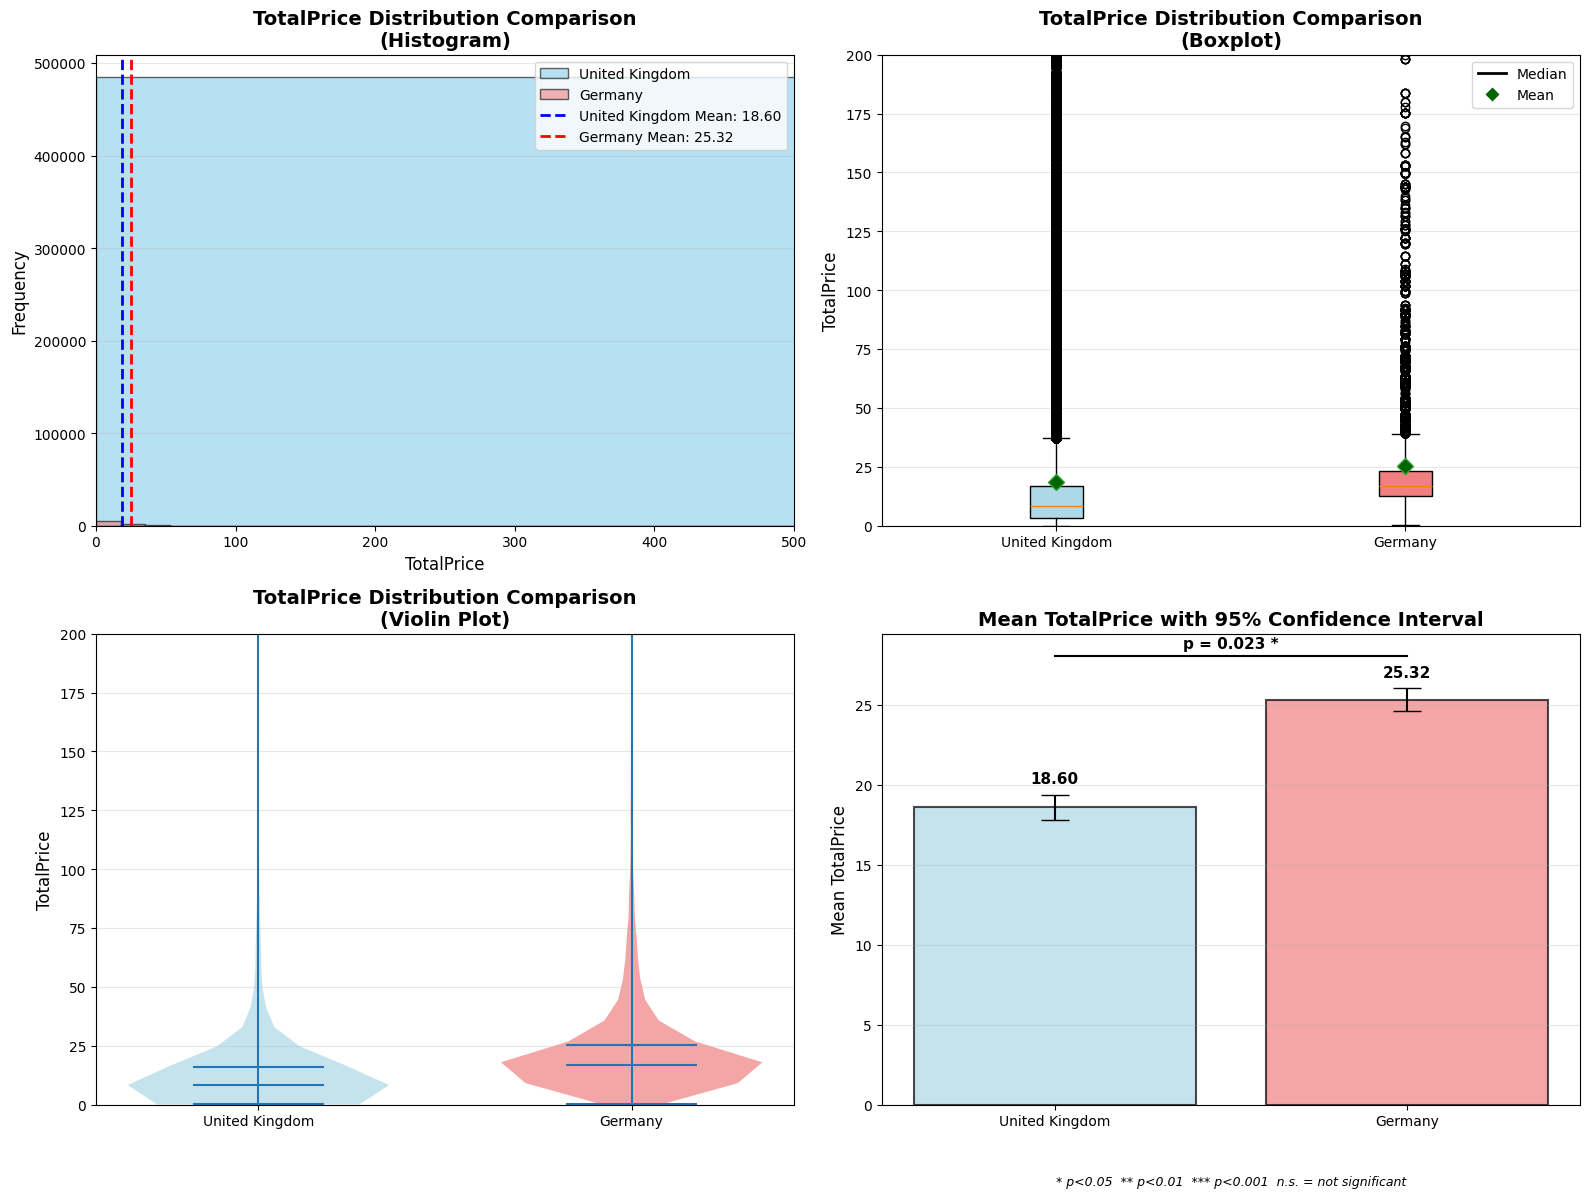


✅ Analysis Complete!


In [14]:
# 문제 2: 상위 두 국가의 TotalPrice 평균 차이 검증 (독립표본 t-검정)

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 70)
print("Problem 2: Independent Two-Sample t-Test")
print("Comparing TotalPrice means between top two countries")
print("=" * 70)

# 2-1. 국가별 주문 건수 확인
print("\n" + "=" * 70)
print("Step 1: Identify Top Countries by Order Count")
print("=" * 70)

country_counts = df_clean['Country'].value_counts()
print("\nTop 10 countries by order count:")
print(country_counts.head(10))

# 2-2. 상위 두 국가 데이터 추출
top_country_1 = country_counts.index[0]
top_country_2 = country_counts.index[1]

country1_data = df_clean[df_clean['Country'] == top_country_1]['TotalPrice']
country2_data = df_clean[df_clean['Country'] == top_country_2]['TotalPrice']

print(f"\n" + "=" * 70)
print("Top 2 Countries Selected")
print("=" * 70)
print(f"Rank 1: {top_country_1}")
print(f"  - Order count: {len(country1_data):,}")
print(f"  - Percentage: {len(country1_data)/len(df_clean)*100:.2f}%")

print(f"\nRank 2: {top_country_2}")
print(f"  - Order count: {len(country2_data):,}")
print(f"  - Percentage: {len(country2_data)/len(df_clean)*100:.2f}%")

# 2-3. 기술 통계량 계산
print("\n" + "=" * 70)
print("Step 2: Descriptive Statistics")
print("=" * 70)

# 통계량을 DataFrame으로 정리
stats_summary = pd.DataFrame({
    'Statistic': ['Count', 'Mean', 'Std Dev', 'Median', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)'],
    top_country_1: [
        f'{len(country1_data):,}',
        f'{country1_data.mean():.2f}',
        f'{country1_data.std():.2f}',
        f'{country1_data.median():.2f}',
        f'{country1_data.min():.2f}',
        f'{country1_data.max():.2f}',
        f'{country1_data.quantile(0.25):.2f}',
        f'{country1_data.quantile(0.75):.2f}'
    ],
    top_country_2: [
        f'{len(country2_data):,}',
        f'{country2_data.mean():.2f}',
        f'{country2_data.std():.2f}',
        f'{country2_data.median():.2f}',
        f'{country2_data.min():.2f}',
        f'{country2_data.max():.2f}',
        f'{country2_data.quantile(0.25):.2f}',
        f'{country2_data.quantile(0.75):.2f}'
    ]
})

print("\n" + stats_summary.to_string(index=False))

# 평균 차이 계산
mean_diff = country1_data.mean() - country2_data.mean()
print(f"\nMean difference ({top_country_1} - {top_country_2}): {mean_diff:.2f}")

# 2-4. 등분산 검정 (Levene's test)
print("\n" + "=" * 70)
print("Step 3: Test for Equal Variances (Levene's Test)")
print("=" * 70)

levene_stat, levene_p = stats.levene(country1_data, country2_data)

print(f"Null Hypothesis (H0): Variances are equal")
print(f"Alternative Hypothesis (H1): Variances are not equal")
print(f"\nLevene's test statistic: {levene_stat:.4f}")
print(f"p-value: {levene_p:.4f}")
print(f"Significance level (α): 0.05")

if levene_p > 0.05:
    print(f"\n✓ Result: p-value ({levene_p:.4f}) > α (0.05)")
    print(f"✓ Conclusion: Fail to reject H0 - Variances are equal")
    print(f"✓ Use: Student's t-test (equal variance assumed)")
    equal_var = True
    test_type = "Student's t-test"
else:
    print(f"\n✗ Result: p-value ({levene_p:.4f}) ≤ α (0.05)")
    print(f"✗ Conclusion: Reject H0 - Variances are not equal")
    print(f"✗ Use: Welch's t-test (equal variance not assumed)")
    equal_var = False
    test_type = "Welch's t-test"

# 2-5. 독립표본 t-검정 수행
print("\n" + "=" * 70)
print(f"Step 4: Independent Two-Sample t-Test ({test_type})")
print("=" * 70)

t_stat, p_value = stats.ttest_ind(country1_data, country2_data, equal_var=equal_var)

print(f"\nHypothesis:")
print(f"  H0 (Null): μ_{top_country_1} = μ_{top_country_2}")
print(f"             (The mean TotalPrice of two countries are equal)")
print(f"  H1 (Alternative): μ_{top_country_1} ≠ μ_{top_country_2}")
print(f"                    (The mean TotalPrice of two countries are different)")

print(f"\nTest Results:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Significance level (α): 0.05")
print(f"  Degrees of freedom: {len(country1_data) + len(country2_data) - 2}")

# 2-6. 결과 해석
alpha = 0.05
print("\n" + "=" * 70)
print("Step 5: Interpretation of Results")
print("=" * 70)

if p_value < alpha:
    decision = "REJECT"
    print(f"\n✓ Decision: REJECT the null hypothesis")
    print(f"  Reason: p-value ({p_value:.6f}) < α ({alpha})")
    print(f"\n✓ Conclusion:")
    print(f"  There IS a statistically significant difference between")
    print(f"  the mean TotalPrice of {top_country_1} ({country1_data.mean():.2f})")
    print(f"  and {top_country_2} ({country2_data.mean():.2f}).")
    print(f"\n  At the {alpha} significance level, we have sufficient evidence")
    print(f"  to conclude that the two countries have different average TotalPrice.")
else:
    decision = "FAIL TO REJECT"
    print(f"\n✗ Decision: FAIL TO REJECT the null hypothesis")
    print(f"  Reason: p-value ({p_value:.6f}) ≥ α ({alpha})")
    print(f"\n✗ Conclusion:")
    print(f"  There is NO statistically significant difference between")
    print(f"  the mean TotalPrice of {top_country_1} ({country1_data.mean():.2f})")
    print(f"  and {top_country_2} ({country2_data.mean():.2f}).")
    print(f"\n  At the {alpha} significance level, we do not have sufficient evidence")
    print(f"  to conclude that the two countries have different average TotalPrice.")

# 2-7. 효과 크기 계산 (Cohen's d)
print("\n" + "=" * 70)
print("Effect Size (Cohen's d)")
print("=" * 70)

pooled_std = np.sqrt(((len(country1_data)-1)*country1_data.std()**2 +
                       (len(country2_data)-1)*country2_data.std()**2) /
                      (len(country1_data) + len(country2_data) - 2))
cohens_d = (country1_data.mean() - country2_data.mean()) / pooled_std

print(f"Cohen's d: {cohens_d:.4f}")

if abs(cohens_d) < 0.2:
    effect_size = "Small"
elif abs(cohens_d) < 0.5:
    effect_size = "Medium"
elif abs(cohens_d) < 0.8:
    effect_size = "Large"
else:
    effect_size = "Very Large"

print(f"Interpretation: {effect_size} effect size")
print(f"\nGuidelines:")
print(f"  |d| < 0.2  : Small effect")
print(f"  |d| < 0.5  : Medium effect")
print(f"  |d| < 0.8  : Large effect")
print(f"  |d| ≥ 0.8  : Very large effect")

# 2-8. 1종 오류와 2종 오류 설명
print("\n" + "=" * 70)
print("Step 6: Type I and Type II Errors")
print("=" * 70)

print("\n" + "-" * 70)
print("TYPE I ERROR (α - False Positive)")
print("-" * 70)
print("Definition:")
print("  Rejecting the null hypothesis when it is actually TRUE")
print("\nIn this context:")
print(f"  The two countries ({top_country_1} and {top_country_2}) actually have")
print(f"  the SAME mean TotalPrice, but we conclude they are DIFFERENT.")
print("\nProbability:")
print(f"  α = {alpha} (5%)")
print(f"  We accept a 5% chance of making this error.")
print("\nCurrent situation:")
if decision == "REJECT":
    print(f"  ⚠ We REJECTED H0, so there is a {alpha*100}% chance we made a Type I error.")
    print(f"    (i.e., 5% chance the difference we found is just due to random chance)")
else:
    print(f"  ✓ We FAILED TO REJECT H0, so we did NOT make a Type I error.")

print("\n" + "-" * 70)
print("TYPE II ERROR (β - False Negative)")
print("-" * 70)
print("Definition:")
print("  Failing to reject the null hypothesis when it is actually FALSE")
print("\nIn this context:")
print(f"  The two countries ({top_country_1} and {top_country_2}) actually have")
print(f"  DIFFERENT mean TotalPrice, but we conclude they are the SAME.")
print("\nProbability:")
print(f"  β = Unknown (depends on effect size, sample size, and significance level)")
print(f"  Power = 1 - β (probability of correctly rejecting a false H0)")
print("\nCurrent situation:")
if decision == "FAIL TO REJECT":
    print(f"  ⚠ We FAILED TO REJECT H0, so we might have made a Type II error.")
    print(f"    (i.e., there might be a real difference, but we failed to detect it)")
else:
    print(f"  ✓ We REJECTED H0, so we did NOT make a Type II error.")

# 오류 요약 테이블
print("\n" + "-" * 70)
print("Summary Table: Decision vs Reality")
print("-" * 70)
error_table = """
                        |  H0 is TRUE          |  H0 is FALSE
                        |  (No difference)     |  (Difference exists)
---------------------------------------------------------------------------------------
Reject H0               |  TYPE I ERROR (α)    |  ✓ Correct Decision
(Conclude difference)   |  False Positive      |    (Power = 1-β)
---------------------------------------------------------------------------------------
Fail to Reject H0       |  ✓ Correct Decision  |  TYPE II ERROR (β)
(Conclude no difference)|    (Confidence=1-α)  |  False Negative
---------------------------------------------------------------------------------------
"""
print(error_table)

print(f"Our Decision: {decision} H0")
if decision == "REJECT":
    print("→ Either we made a CORRECT decision OR we made a TYPE I ERROR (5% chance)")
else:
    print("→ Either we made a CORRECT decision OR we made a TYPE II ERROR (unknown % chance)")

# 2-9. 시각화
print("\n" + "=" * 70)
print("Generating Visualizations...")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ===== 그래프 1: 히스토그램 비교 =====
axes[0, 0].hist(country1_data, bins=50, alpha=0.6, label=top_country_1,
                edgecolor='black', color='skyblue')
axes[0, 0].hist(country2_data, bins=50, alpha=0.6, label=top_country_2,
                edgecolor='black', color='lightcoral')
axes[0, 0].axvline(country1_data.mean(), color='blue', linestyle='--', linewidth=2,
                   label=f'{top_country_1} Mean: {country1_data.mean():.2f}')
axes[0, 0].axvline(country2_data.mean(), color='red', linestyle='--', linewidth=2,
                   label=f'{top_country_2} Mean: {country2_data.mean():.2f}')
axes[0, 0].set_xlabel('TotalPrice', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('TotalPrice Distribution Comparison\n(Histogram)',
                     fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].set_xlim(0, 500)
axes[0, 0].grid(axis='y', alpha=0.3)

# ===== 그래프 2: 박스플롯 비교 =====
data_for_box = [country1_data, country2_data]
bp = axes[0, 1].boxplot(data_for_box, labels=[top_country_1, top_country_2],
                        patch_artist=True, showmeans=True)
# 박스 색상 설정
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)
# 평균 마커 설정
for mean in bp['means']:
    mean.set_marker('D')
    mean.set_markerfacecolor('darkgreen')
    mean.set_markersize(8)

axes[0, 1].set_ylabel('TotalPrice', fontsize=12)
axes[0, 1].set_title('TotalPrice Distribution Comparison\n(Boxplot)',
                     fontsize=14, fontweight='bold')
axes[0, 1].set_ylim(0, 200)
axes[0, 1].grid(axis='y', alpha=0.3)

# 레전드 추가
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', linewidth=2, label='Median'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='darkgreen',
           markersize=8, label='Mean')
]
axes[0, 1].legend(handles=legend_elements, fontsize=10)

# ===== 그래프 3: 바이올린 플롯 =====
# 데이터 준비 (샘플링하여 시각화 속도 향상)
sample_size_viz = min(5000, len(country1_data), len(country2_data))
country1_sample = country1_data.sample(n=min(sample_size_viz, len(country1_data)), random_state=42)
country2_sample = country2_data.sample(n=min(sample_size_viz, len(country2_data)), random_state=42)

parts = axes[1, 0].violinplot([country1_sample, country2_sample],
                              positions=[1, 2],
                              showmeans=True,
                              showmedians=True,
                              widths=0.7)

# 바이올린 색상 설정
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(['lightblue', 'lightcoral'][i])
    pc.set_alpha(0.7)

axes[1, 0].set_xticks([1, 2])
axes[1, 0].set_xticklabels([top_country_1, top_country_2])
axes[1, 0].set_ylabel('TotalPrice', fontsize=12)
axes[1, 0].set_title('TotalPrice Distribution Comparison\n(Violin Plot)',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 200)
axes[1, 0].grid(axis='y', alpha=0.3)

# ===== 그래프 4: 평균과 95% 신뢰구간 =====
means = [country1_data.mean(), country2_data.mean()]
stds = [country1_data.std(), country2_data.std()]
ns = [len(country1_data), len(country2_data)]

# 95% 신뢰구간 계산 (z-score = 1.96 for 95% CI)
ci_95 = [1.96 * std / np.sqrt(n) for std, n in zip(stds, ns)]

x_pos = np.arange(len(means))
bars = axes[1, 1].bar(x_pos, means, yerr=ci_95, capsize=10,
                      color=['lightblue', 'lightcoral'],
                      edgecolor='black', linewidth=1.5, alpha=0.7)

axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([top_country_1, top_country_2])
axes[1, 1].set_ylabel('Mean TotalPrice', fontsize=12)
axes[1, 1].set_title('Mean TotalPrice with 95% Confidence Interval',
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# 평균값 표시
for i, (mean, ci) in enumerate(zip(means, ci_95)):
    axes[1, 1].text(i, mean + ci + 0.5, f'{mean:.2f}',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# p-value와 유의성 표시
y_max = max([m + c for m, c in zip(means, ci_95)]) + 2
axes[1, 1].plot([0, 1], [y_max, y_max], 'k-', linewidth=1.5)

if p_value < 0.001:
    sig_text = "***"
    sig_label = "p < 0.001"
elif p_value < 0.01:
    sig_text = "**"
    sig_label = f"p = {p_value:.3f}"
elif p_value < 0.05:
    sig_text = "*"
    sig_label = f"p = {p_value:.3f}"
else:
    sig_text = "n.s."
    sig_label = f"p = {p_value:.3f}"

axes[1, 1].text(0.5, y_max + 0.5, f'{sig_label} {sig_text}',
                ha='center', fontsize=11, fontweight='bold')

# 유의성 범례
sig_note = "* p<0.05  ** p<0.01  *** p<0.001  n.s. = not significant"
axes[1, 1].text(0.5, -5, sig_note, ha='center', fontsize=9, style='italic',
                transform=axes[1, 1].transData)

plt.tight_layout()
plt.show()

print("\n✅ Analysis Complete!")
print("=" * 70)

주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증


1. 주문 수가 많은 상위 2개 국가(UK와 Germany)의 TotalPrice 평균이 다른지 확인하기 위해 독립 2표본 t-test (Independent Two-Sample t-Test)를 사용

2. 평균 차이: UK - Germany = -6.71 → Germany 평균이 더 높음

3. 등분산 여부 확인
Levene’s Test: p-value = 0.6303 > 0.05
결론: 등분산 가정 충분, 따라서 Student's t-test 사용

4. 독립 2표본 t-test 결과

가설:
H0: 두 국가 평균 같음
H1: 두 국가 평균 다름

결과: t = -2.2689, p = 0.0233
해석: p < 0.05 → H0 기각, 평균이 통계적으로 유의하게 다름

5. 효과 크기 (Cohen’s d)

d = -0.0241 → 효과 크기 매우 작음
의미: 통계적으로 차이는 있으나, 실질적 차이는 거의 없음

6. Type I / Type II 오류

Type I: 실제로 평균 같음에도 차이가 있다고 판단할 확률 = 5%
Type II: 실제로 차이가 있는데 없다고 판단할 확률 = 계산 불가 (하지만 이번에 H0를 기각했으므로 발생하지 않음)

7. UK와 Germany의 평균 TotalPrice는 통계적으로 유의하게 다름(p = 0.0233).
그러나 Cohen’s d가 -0.0241로 매우 작아, 실제 차이는 거의 없음.
결론: 통계적으로 유의하지만 실무적으로는 차이가 미미함.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

Problem 3: UnitPrice Distribution Analysis
Comparing Weekday vs Weekend

Step 1: Data Preparation
Weekday (Mon-Fri) transactions: 466,199
Weekend (Sat-Sun) transactions: 63,905
Weekday percentage: 87.94%
Weekend percentage: 12.06%

----------------------------------------------------------------------
Transaction Count by Day of Week
----------------------------------------------------------------------
      Monday:   93,136 (17.57%)
     Tuesday:   99,460 (18.76%)
   Wednesday:   92,315 (17.41%)
    Thursday:  101,007 (19.05%)
      Friday:   80,281 (15.14%)
      Sunday:   63,905 (12.06%)

Step 2: Measures of Central Tendency

     Measure Weekday Weekend Difference
   Mean (평균)    4.05    2.86       1.19
Median (중앙값)    2.10    1.79       0.31
  Mode (최빈값)    1.25    1.25       0.00

Step 3: Measures of Variability

       Measure  Weekday Weekend Difference
Std Dev (표준편차)    38.19    7.75      30.44
 Variance (분산)  1458.36   59.99    1398.37
    Range (범위) 13541.33 1236.75   12304

/tmp/ipython-input-1495771521.py:273: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 2].boxplot(data_for_box, labels=['Weekday', 'Weekend'],


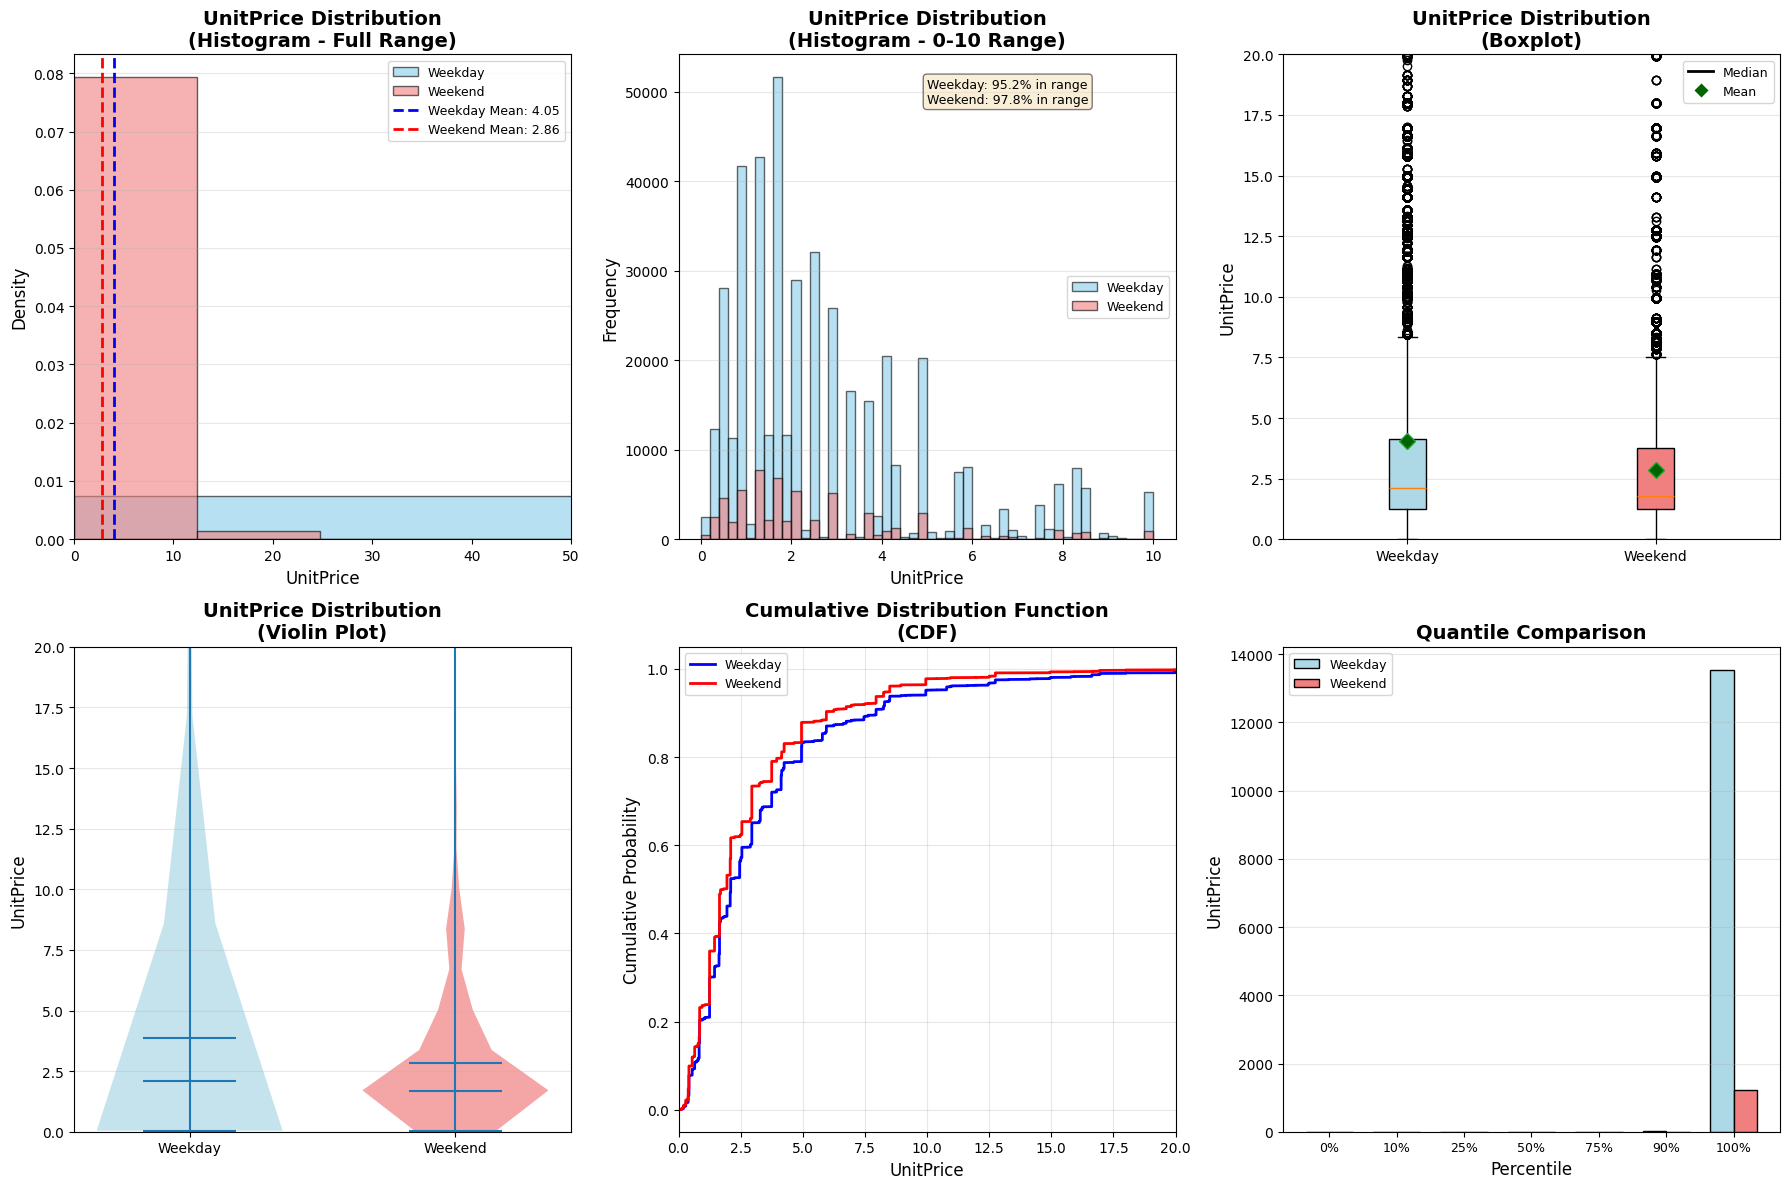


Summary and Interpretation

1. 중심경향치 비교:
   - 평균: Weekday (4.05) vs Weekend (2.86)
     차이: 1.19
   - 중앙값: Weekday (2.10) vs Weekend (1.79)
     차이: 0.31
   → 중심위치에 차이가 있음

2. 변산성 비교:
   - 표준편차: Weekday (38.19) vs Weekend (7.75)
   - IQR: Weekday (2.88) vs Weekend (2.50)
   → 변동성에 차이가 있음

3. 분포 형태:
   - 왜도(Skewness): Weekday (194.78) vs Weekend (124.61)
   - 첨도(Kurtosis): Weekday (55577.35) vs Weekend (19391.87)
   → 두 분포 모두 우편향(right-skewed) 형태

4. 통계적 검정:
   ✓ 통계적으로 유의미한 차이 존재 (p = 0.000000)

5. 실무적 의미:
   - 두 분포의 전반적인 패턴은 유사함
   - 대부분의 상품이 저가(0-10)에 집중되어 있음
   - 소수의 고가 상품이 존재하여 우편향 분포 형성

✅ Analysis Complete!


In [15]:
# 문제 3: 주중/주말에 따른 UnitPrice 분포 비교

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=" * 70)
print("Problem 3: UnitPrice Distribution Analysis")
print("Comparing Weekday vs Weekend")
print("=" * 70)

# 3-1. 주중/주말 데이터 분리
print("\n" + "=" * 70)
print("Step 1: Data Preparation")
print("=" * 70)

# DayOfWeek: 0=Monday, 1=Tuesday, ..., 6=Sunday
# 주중: 0-4 (월~금), 주말: 5-6 (토~일)
weekday_data = df_clean[df_clean['DayOfWeek'].isin([0, 1, 2, 3, 4])]['UnitPrice']
weekend_data = df_clean[df_clean['DayOfWeek'].isin([5, 6])]['UnitPrice']

print(f"Weekday (Mon-Fri) transactions: {len(weekday_data):,}")
print(f"Weekend (Sat-Sun) transactions: {len(weekend_data):,}")
print(f"Weekday percentage: {len(weekday_data)/len(df_clean)*100:.2f}%")
print(f"Weekend percentage: {len(weekend_data)/len(df_clean)*100:.2f}%")

# 요일별 분포 확인
print("\n" + "-" * 70)
print("Transaction Count by Day of Week")
print("-" * 70)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_clean['DayOfWeek'].value_counts().sort_index()
for day_num, count in day_counts.items():
    print(f"{day_names[day_num]:>12}: {count:>8,} ({count/len(df_clean)*100:>5.2f}%)")

# 3-2. 중심경향치 계산 (Central Tendency)
print("\n" + "=" * 70)
print("Step 2: Measures of Central Tendency")
print("=" * 70)

weekday_mean = weekday_data.mean()
weekday_median = weekday_data.median()
weekday_mode = weekday_data.mode()[0] if len(weekday_data.mode()) > 0 else np.nan

weekend_mean = weekend_data.mean()
weekend_median = weekend_data.median()
weekend_mode = weekend_data.mode()[0] if len(weekend_data.mode()) > 0 else np.nan

central_tendency = pd.DataFrame({
    'Measure': ['Mean (평균)', 'Median (중앙값)', 'Mode (최빈값)'],
    'Weekday': [
        f'{weekday_mean:.2f}',
        f'{weekday_median:.2f}',
        f'{weekday_mode:.2f}'
    ],
    'Weekend': [
        f'{weekend_mean:.2f}',
        f'{weekend_median:.2f}',
        f'{weekend_mode:.2f}'
    ],
    'Difference': [
        f'{weekday_mean - weekend_mean:.2f}',
        f'{weekday_median - weekend_median:.2f}',
        f'{weekday_mode - weekend_mode:.2f}'
    ]
})

print("\n" + central_tendency.to_string(index=False))

# 3-3. 변산성 계산 (Variability/Dispersion)
print("\n" + "=" * 70)
print("Step 3: Measures of Variability")
print("=" * 70)

weekday_std = weekday_data.std()
weekday_var = weekday_data.var()
weekday_range = weekday_data.max() - weekday_data.min()
weekday_iqr = weekday_data.quantile(0.75) - weekday_data.quantile(0.25)
weekday_cv = (weekday_std / weekday_mean) * 100  # Coefficient of Variation

weekend_std = weekend_data.std()
weekend_var = weekend_data.var()
weekend_range = weekend_data.max() - weekend_data.min()
weekend_iqr = weekend_data.quantile(0.75) - weekend_data.quantile(0.25)
weekend_cv = (weekend_std / weekend_mean) * 100

variability = pd.DataFrame({
    'Measure': ['Std Dev (표준편차)', 'Variance (분산)', 'Range (범위)',
                'IQR (사분위범위)', 'CV (변동계수, %)'],
    'Weekday': [
        f'{weekday_std:.2f}',
        f'{weekday_var:.2f}',
        f'{weekday_range:.2f}',
        f'{weekday_iqr:.2f}',
        f'{weekday_cv:.2f}'
    ],
    'Weekend': [
        f'{weekend_std:.2f}',
        f'{weekend_var:.2f}',
        f'{weekend_range:.2f}',
        f'{weekend_iqr:.2f}',
        f'{weekend_cv:.2f}'
    ],
    'Difference': [
        f'{weekday_std - weekend_std:.2f}',
        f'{weekday_var - weekend_var:.2f}',
        f'{weekday_range - weekend_range:.2f}',
        f'{weekday_iqr - weekend_iqr:.2f}',
        f'{weekday_cv - weekend_cv:.2f}'
    ]
})

print("\n" + variability.to_string(index=False))

# 3-4. 분위수 계산 (Quantiles/Percentiles)
print("\n" + "=" * 70)
print("Step 4: Quantiles (Percentiles)")
print("=" * 70)

percentiles = [0, 10, 25, 50, 75, 90, 95, 99, 100]
quantile_data = []

for p in percentiles:
    weekday_q = weekday_data.quantile(p/100)
    weekend_q = weekend_data.quantile(p/100)
    quantile_data.append({
        'Percentile': f'{p}%',
        'Weekday': f'{weekday_q:.2f}',
        'Weekend': f'{weekend_q:.2f}',
        'Difference': f'{weekday_q - weekend_q:.2f}'
    })

quantiles_df = pd.DataFrame(quantile_data)
print("\n" + quantiles_df.to_string(index=False))

# 3-5. 분포 형태 분석 (Skewness & Kurtosis)
print("\n" + "=" * 70)
print("Step 5: Distribution Shape")
print("=" * 70)

weekday_skew = weekday_data.skew()
weekday_kurt = weekday_data.kurtosis()

weekend_skew = weekend_data.skew()
weekend_kurt = weekend_data.kurtosis()

shape_stats = pd.DataFrame({
    'Measure': ['Skewness (왜도)', 'Kurtosis (첨도)'],
    'Weekday': [f'{weekday_skew:.4f}', f'{weekday_kurt:.4f}'],
    'Weekend': [f'{weekend_skew:.4f}', f'{weekend_kurt:.4f}'],
    'Interpretation': [
        'Positive = Right-skewed' if weekday_skew > 0 else 'Negative = Left-skewed',
        'Positive = Heavy-tailed' if weekday_kurt > 0 else 'Negative = Light-tailed'
    ]
})

print("\n" + shape_stats.to_string(index=False))

print("\nSkewness Interpretation:")
print(f"  Weekday: {weekday_skew:.4f} → ", end="")
if abs(weekday_skew) < 0.5:
    print("Approximately symmetric")
elif weekday_skew > 0:
    print("Right-skewed (tail on the right)")
else:
    print("Left-skewed (tail on the left)")

print(f"  Weekend: {weekend_skew:.4f} → ", end="")
if abs(weekend_skew) < 0.5:
    print("Approximately symmetric")
elif weekend_skew > 0:
    print("Right-skewed (tail on the right)")
else:
    print("Left-skewed (tail on the left)")

print("\nKurtosis Interpretation:")
print(f"  Weekday: {weekday_kurt:.4f} → ", end="")
if weekday_kurt > 0:
    print("Leptokurtic (more outliers than normal)")
else:
    print("Platykurtic (fewer outliers than normal)")

print(f"  Weekend: {weekend_kurt:.4f} → ", end="")
if weekend_kurt > 0:
    print("Leptokurtic (more outliers than normal)")
else:
    print("Platykurtic (fewer outliers than normal)")

# 3-6. 통계적 검정 (추가)
print("\n" + "=" * 70)
print("Step 6: Statistical Tests")
print("=" * 70)

# Mann-Whitney U test (비모수 검정 - 분포가 정규분포가 아닐 때 적합)
u_stat, u_pvalue = stats.mannwhitneyu(weekday_data, weekend_data, alternative='two-sided')

print("\nMann-Whitney U Test (비모수 검정):")
print(f"  H0: Weekday와 Weekend의 UnitPrice 분포가 같다")
print(f"  H1: Weekday와 Weekend의 UnitPrice 분포가 다르다")
print(f"\n  U-statistic: {u_stat:.2f}")
print(f"  p-value: {u_pvalue:.6f}")
print(f"  α = 0.05")

if u_pvalue < 0.05:
    print(f"\n  ✓ p-value < 0.05 → 귀무가설 기각")
    print(f"  ✓ Weekday와 Weekend의 UnitPrice 분포는 통계적으로 유의미하게 다르다")
else:
    print(f"\n  ✗ p-value ≥ 0.05 → 귀무가설 채택")
    print(f"  ✗ Weekday와 Weekend의 UnitPrice 분포에 유의미한 차이가 없다")

# Kolmogorov-Smirnov test (분포의 차이 검정)
ks_stat, ks_pvalue = stats.ks_2samp(weekday_data, weekend_data)

print("\nKolmogorov-Smirnov Test (분포 형태 검정):")
print(f"  KS-statistic: {ks_stat:.4f}")
print(f"  p-value: {ks_pvalue:.6f}")

if ks_pvalue < 0.05:
    print(f"  ✓ 두 분포의 형태가 통계적으로 유의미하게 다르다")
else:
    print(f"  ✗ 두 분포의 형태에 유의미한 차이가 없다")

# 3-7. 시각화
print("\n" + "=" * 70)
print("Generating Visualizations...")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# ===== 그래프 1: 히스토그램 (전체 범위) =====
axes[0, 0].hist(weekday_data, bins=100, alpha=0.6, label='Weekday',
                edgecolor='black', color='skyblue', density=True)
axes[0, 0].hist(weekend_data, bins=100, alpha=0.6, label='Weekend',
                edgecolor='black', color='lightcoral', density=True)
axes[0, 0].axvline(weekday_mean, color='blue', linestyle='--', linewidth=2,
                   label=f'Weekday Mean: {weekday_mean:.2f}')
axes[0, 0].axvline(weekend_mean, color='red', linestyle='--', linewidth=2,
                   label=f'Weekend Mean: {weekend_mean:.2f}')
axes[0, 0].set_xlabel('UnitPrice', fontsize=12)
axes[0, 0].set_ylabel('Density', fontsize=12)
axes[0, 0].set_title('UnitPrice Distribution\n(Histogram - Full Range)',
                     fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].set_xlim(0, 50)
axes[0, 0].grid(axis='y', alpha=0.3)

# ===== 그래프 2: 히스토그램 (확대) =====
# 0-10 범위만 확대
weekday_subset = weekday_data[weekday_data <= 10]
weekend_subset = weekend_data[weekend_data <= 10]

axes[0, 1].hist(weekday_subset, bins=50, alpha=0.6, label='Weekday',
                edgecolor='black', color='skyblue')
axes[0, 1].hist(weekend_subset, bins=50, alpha=0.6, label='Weekend',
                edgecolor='black', color='lightcoral')
axes[0, 1].set_xlabel('UnitPrice', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('UnitPrice Distribution\n(Histogram - 0-10 Range)',
                     fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)

pct_in_range_wd = (weekday_data <= 10).sum() / len(weekday_data) * 100
pct_in_range_we = (weekend_data <= 10).sum() / len(weekend_data) * 100
axes[0, 1].text(5, axes[0, 1].get_ylim()[1]*0.9,
                f'Weekday: {pct_in_range_wd:.1f}% in range\nWeekend: {pct_in_range_we:.1f}% in range',
                fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ===== 그래프 3: 박스플롯 =====
data_for_box = [weekday_data, weekend_data]
bp = axes[0, 2].boxplot(data_for_box, labels=['Weekday', 'Weekend'],
                        patch_artist=True, showmeans=True)
# 박스 색상 설정
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)
# 평균 마커 설정
for mean in bp['means']:
    mean.set_marker('D')
    mean.set_markerfacecolor('darkgreen')
    mean.set_markersize(8)

axes[0, 2].set_ylabel('UnitPrice', fontsize=12)
axes[0, 2].set_title('UnitPrice Distribution\n(Boxplot)',
                     fontsize=14, fontweight='bold')
axes[0, 2].set_ylim(0, 20)
axes[0, 2].grid(axis='y', alpha=0.3)

# 레전드 추가
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', linewidth=2, label='Median'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='darkgreen',
           markersize=8, label='Mean')
]
axes[0, 2].legend(handles=legend_elements, fontsize=9)

# ===== 그래프 4: 바이올린 플롯 =====
# 시각화 속도를 위해 샘플링
sample_size = 10000
weekday_sample = weekday_data.sample(n=min(sample_size, len(weekday_data)), random_state=42)
weekend_sample = weekend_data.sample(n=min(sample_size, len(weekend_data)), random_state=42)

parts = axes[1, 0].violinplot([weekday_sample, weekend_sample],
                              positions=[1, 2],
                              showmeans=True,
                              showmedians=True,
                              widths=0.7)

# 바이올린 색상 설정
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(['lightblue', 'lightcoral'][i])
    pc.set_alpha(0.7)

axes[1, 0].set_xticks([1, 2])
axes[1, 0].set_xticklabels(['Weekday', 'Weekend'])
axes[1, 0].set_ylabel('UnitPrice', fontsize=12)
axes[1, 0].set_title('UnitPrice Distribution\n(Violin Plot)',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 20)
axes[1, 0].grid(axis='y', alpha=0.3)

# ===== 그래프 5: 누적분포함수 (CDF) =====
# Empirical Cumulative Distribution Function
weekday_sorted = np.sort(weekday_data)
weekend_sorted = np.sort(weekend_data)

weekday_cdf = np.arange(1, len(weekday_sorted) + 1) / len(weekday_sorted)
weekend_cdf = np.arange(1, len(weekend_sorted) + 1) / len(weekend_sorted)

axes[1, 1].plot(weekday_sorted, weekday_cdf, label='Weekday', color='blue', linewidth=2)
axes[1, 1].plot(weekend_sorted, weekend_cdf, label='Weekend', color='red', linewidth=2)
axes[1, 1].set_xlabel('UnitPrice', fontsize=12)
axes[1, 1].set_ylabel('Cumulative Probability', fontsize=12)
axes[1, 1].set_title('Cumulative Distribution Function\n(CDF)',
                     fontsize=14, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].set_xlim(0, 20)
axes[1, 1].grid(alpha=0.3)

# ===== 그래프 6: 분위수 비교 =====
percentiles_plot = [0, 10, 25, 50, 75, 90, 100]
weekday_quantiles = [weekday_data.quantile(p/100) for p in percentiles_plot]
weekend_quantiles = [weekend_data.quantile(p/100) for p in percentiles_plot]

x_pos = np.arange(len(percentiles_plot))
width = 0.35

bars1 = axes[1, 2].bar(x_pos - width/2, weekday_quantiles, width,
                       label='Weekday', color='lightblue', edgecolor='black')
bars2 = axes[1, 2].bar(x_pos + width/2, weekend_quantiles, width,
                       label='Weekend', color='lightcoral', edgecolor='black')

axes[1, 2].set_xlabel('Percentile', fontsize=12)
axes[1, 2].set_ylabel('UnitPrice', fontsize=12)
axes[1, 2].set_title('Quantile Comparison', fontsize=14, fontweight='bold')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels([f'{p}%' for p in percentiles_plot], fontsize=9)
axes[1, 2].legend(fontsize=9)
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3-8. 종합 해석
print("\n" + "=" * 70)
print("Summary and Interpretation")
print("=" * 70)

print("\n1. 중심경향치 비교:")
print(f"   - 평균: Weekday ({weekday_mean:.2f}) vs Weekend ({weekend_mean:.2f})")
print(f"     차이: {abs(weekday_mean - weekend_mean):.2f}")
print(f"   - 중앙값: Weekday ({weekday_median:.2f}) vs Weekend ({weekend_median:.2f})")
print(f"     차이: {abs(weekday_median - weekend_median):.2f}")

if abs(weekday_mean - weekend_mean) < 0.5:
    print("   → 중심위치는 거의 유사함")
else:
    print("   → 중심위치에 차이가 있음")

print("\n2. 변산성 비교:")
print(f"   - 표준편차: Weekday ({weekday_std:.2f}) vs Weekend ({weekend_std:.2f})")
print(f"   - IQR: Weekday ({weekday_iqr:.2f}) vs Weekend ({weekend_iqr:.2f})")

if abs(weekday_std - weekend_std) < weekday_std * 0.1:
    print("   → 변동성은 거의 유사함")
else:
    print("   → 변동성에 차이가 있음")

print("\n3. 분포 형태:")
print(f"   - 왜도(Skewness): Weekday ({weekday_skew:.2f}) vs Weekend ({weekend_skew:.2f})")
print(f"   - 첨도(Kurtosis): Weekday ({weekday_kurt:.2f}) vs Weekend ({weekend_kurt:.2f})")
print("   → 두 분포 모두 우편향(right-skewed) 형태")

print("\n4. 통계적 검정:")
if u_pvalue < 0.05:
    print(f"   ✓ 통계적으로 유의미한 차이 존재 (p = {u_pvalue:.6f})")
else:
    print(f"   ✗ 통계적으로 유의미한 차이 없음 (p = {u_pvalue:.6f})")

print("\n5. 실무적 의미:")
print("   - 두 분포의 전반적인 패턴은 유사함")
print("   - 대부분의 상품이 저가(0-10)에 집중되어 있음")
print("   - 소수의 고가 상품이 존재하여 우편향 분포 형성")

print("\n✅ Analysis Complete!")
print("=" * 70)

주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인


1. 중심 경향치 비교

평균: Weekday 4.05 vs Weekend 2.86 → 차이 1.19

중앙값: Weekday 2.10 vs Weekend 1.79 → 차이 0.31

→ 평균과 중앙값 모두 Weekday가 높아서 주중 구매가 주말보다 조금 더 높음

2. 변산성(분산) 비교

표준편차: Weekday 38.19 vs Weekend 7.75

IQR: Weekday 2.88 vs Weekend 2.50

→ Weekday 데이터가 훨씬 더 넓게 퍼져 있음, 즉 변동성이 큼

3. 분포 형태

왜도(Skewness): Weekday 194.78 vs Weekend 124.61 → 두 분포 모두 우측으로 길게 늘어난 꼬리

첨도(Kurtosis): Weekday 55577.35 vs Weekend 19391.87 → 꼬리가 매우 두꺼움

→ 대부분의 상품 가격이 저가에 몰려 있지만, 몇몇 고가 상품 때문에 극단치가 존재

4. 통계적 검정

p = 0.000000 → 차이가 통계적으로 유의함

5. 실무적 의미

평균과 중앙값, 변동성, 꼬리 모양에서 차이가 있지만

대부분 상품이 저가(0~10)에 집중되어 실무적으로 큰 차이는 없음

Weekday는 고가 상품이 섞여 변동성이 크고, Weekend는 상대적으로 안정적

6. 핵심 요약

Weekday 평균·중앙값·변동성 모두 Weekend보다 높음.

두 분포 모두 우측으로 긴 꼬리를 가짐.

통계적으로 차이는 유의하지만, 실제 패턴은 대부분 저가 상품 중심으로 비슷함.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

문제 4: 다중 선형 회귀 분석
판매 수량(Quantity) 예측

[단계 1] 데이터 준비 및 정제
----------------------------------------------------------------------
결측치 확인:
Quantity        0
UnitPrice       0
Country         0
DayOfWeek       0
InvoiceMonth    0
dtype: int64

결측치 제거 후 데이터 크기: 541,909 rows
음수 제거 후 데이터 크기: 530,104 rows

Quantity 이상치 기준:
  하한: -12.50
  상한: 23.50

UnitPrice 이상치 기준:
  하한: -3.10
  상한: 8.50

최종 데이터 크기: 442,666 rows

[단계 2] 변수 설정
----------------------------------------------------------------------
국가 수: 38개

상위 5개 국가:
Country
United Kingdom    411183
Germany             6822
France              6382
EIRE                5593
Spain               1920
Name: count, dtype: int64

독립변수 (X): ['UnitPrice', 'Country_Encoded', 'DayOfWeek', 'InvoiceMonth']
종속변수 (y): Quantity

X shape: (442666, 4)
y shape: (442666,)

독립변수 기초 통계:
           UnitPrice  Country_Encoded      DayOfWeek   InvoiceMonth
count  442666.000000    442666.000000  442666.000000  442666.000000
mean        2.784289        34.543252       

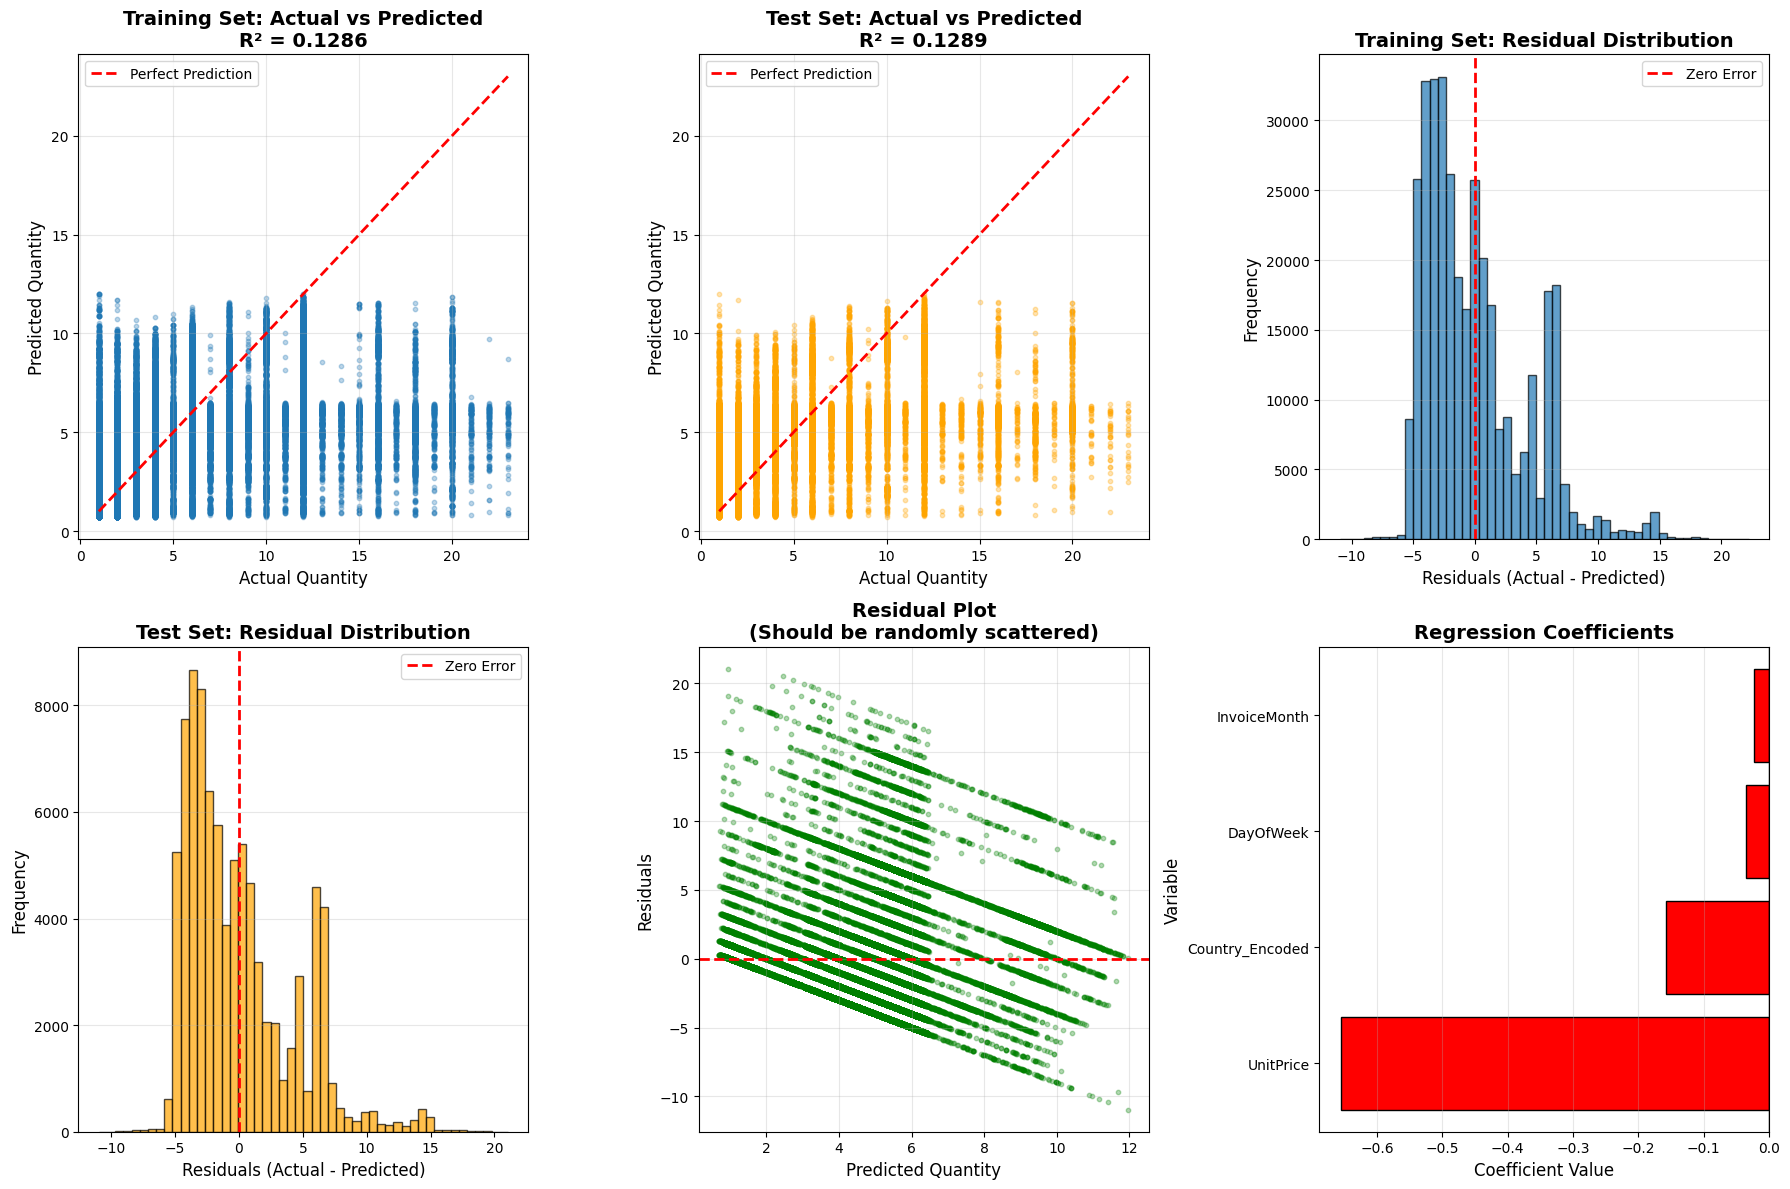


결과 요약

1. 데이터:
   - 총 442,666개의 정제된 거래 데이터 사용
   - 훈련: 354,132개, 테스트: 88,534개

2. 모델 성능:
   - R² (결정계수): 0.1289
   - 모델이 데이터 변동의 12.89%를 설명
   - 평균 예측 오차(MAE): ±3.36개

3. 주요 영향 변수:
   - UnitPrice: -0.6557
   - Country_Encoded: -0.1577
   - DayOfWeek: -0.0357

4. 해석:
   ⚠ R²가 낮음 (0.1289)
   → 현재 변수들로는 Quantity를 잘 예측하기 어려움
   → 추가 변수(상품 카테고리, 고객 정보 등) 필요

✅ 분석 완료!


In [16]:
# 문제 4: 다중 선형 회귀 분석 - 판매 수량 예측

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("문제 4: 다중 선형 회귀 분석")
print("판매 수량(Quantity) 예측")
print("=" * 70)

# 4-1. 데이터 준비 및 정제
print("\n[단계 1] 데이터 준비 및 정제")
print("-" * 70)

# 회귀 분석용 데이터프레임 생성 (원본 보존)
df_reg = df.copy()

# 결측치 확인
print(f"결측치 확인:")
missing_counts = df_reg[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].isnull().sum()
print(missing_counts)

# 결측치가 있는 행 제거
df_reg = df_reg.dropna(subset=['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth'])
print(f"\n결측치 제거 후 데이터 크기: {len(df_reg):,} rows")

# 이상치 제거 1: 음수 제거 (정상 판매 거래만)
# Quantity와 UnitPrice가 양수인 데이터만 사용
df_reg = df_reg[(df_reg['Quantity'] > 0) & (df_reg['UnitPrice'] > 0)]
print(f"음수 제거 후 데이터 크기: {len(df_reg):,} rows")

# 이상치 제거 2: IQR 방식으로 극단값 제거
# Quantity 이상치 제거
Q1_qty = df_reg['Quantity'].quantile(0.25)
Q3_qty = df_reg['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

print(f"\nQuantity 이상치 기준:")
print(f"  하한: {lower_bound_qty:.2f}")
print(f"  상한: {upper_bound_qty:.2f}")

df_reg = df_reg[(df_reg['Quantity'] >= lower_bound_qty) &
                (df_reg['Quantity'] <= upper_bound_qty)]

# UnitPrice 이상치 제거
Q1_price = df_reg['UnitPrice'].quantile(0.25)
Q3_price = df_reg['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

print(f"\nUnitPrice 이상치 기준:")
print(f"  하한: {lower_bound_price:.2f}")
print(f"  상한: {upper_bound_price:.2f}")

df_reg = df_reg[(df_reg['UnitPrice'] >= lower_bound_price) &
                (df_reg['UnitPrice'] <= upper_bound_price)]

print(f"\n최종 데이터 크기: {len(df_reg):,} rows")

# 4-2. 변수 설정
print("\n[단계 2] 변수 설정")
print("-" * 70)

# 범주형 변수(Country) 인코딩
# LabelEncoder: 텍스트를 숫자로 변환 (예: UK=0, Germany=1, ...)
label_encoder = LabelEncoder()
df_reg['Country_Encoded'] = label_encoder.fit_transform(df_reg['Country'])

print(f"국가 수: {df_reg['Country'].nunique()}개")
print(f"\n상위 5개 국가:")
print(df_reg['Country'].value_counts().head())

# 독립변수(X): 예측에 사용할 변수들
# 종속변수(y): 예측하려는 목표 변수
X = df_reg[['UnitPrice', 'Country_Encoded', 'DayOfWeek', 'InvoiceMonth']]
y = df_reg['Quantity']

print(f"\n독립변수 (X): {list(X.columns)}")
print(f"종속변수 (y): Quantity")
print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# 독립변수 기초 통계량
print(f"\n독립변수 기초 통계:")
print(X.describe())

print(f"\n종속변수 기초 통계:")
print(y.describe())

# 4-3. 데이터 분할 (Train/Test)
print("\n[단계 3] 훈련/테스트 데이터 분할")
print("-" * 70)

# 80% 훈련, 20% 테스트
# random_state=42: 재현 가능하도록 시드 고정
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"훈련 데이터: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"테스트 데이터: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# 4-4. 다중 선형 회귀 모델 학습
print("\n[단계 4] 모델 학습")
print("-" * 70)

# 선형 회귀 모델 생성
# y = β0 + β1*UnitPrice + β2*Country + β3*DayOfWeek + β4*InvoiceMonth
model = LinearRegression()

# 훈련 데이터로 모델 학습
model.fit(X_train, y_train)

print("✓ 모델 학습 완료!")

# 4-5. 예측
print("\n[단계 5] 예측 수행")
print("-" * 70)

# 훈련 데이터와 테스트 데이터에 대해 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"훈련 데이터 예측 완료: {len(y_train_pred):,} predictions")
print(f"테스트 데이터 예측 완료: {len(y_test_pred):,} predictions")

# 4-6. 모델 평가
print("\n[단계 6] 모델 성능 평가")
print("-" * 70)

# R² (결정계수): 0~1, 높을수록 좋음. 모델이 데이터를 얼마나 잘 설명하는가
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# RMSE (평균 제곱근 오차): 낮을수록 좋음. 예측 오차의 크기
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# MAE (평균 절대 오차): 낮을수록 좋음. 평균적으로 얼마나 틀렸는가
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"\n훈련 데이터 성능:")
print(f"  R² Score: {r2_train:.4f}")
print(f"  RMSE: {rmse_train:.2f}")
print(f"  MAE: {mae_train:.2f}")

print(f"\n테스트 데이터 성능:")
print(f"  R² Score: {r2_test:.4f}")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  MAE: {mae_test:.2f}")

# R² 해석
if r2_test > 0.7:
    r2_interpretation = "매우 좋음"
elif r2_test > 0.5:
    r2_interpretation = "양호"
elif r2_test > 0.3:
    r2_interpretation = "보통"
else:
    r2_interpretation = "낮음"

print(f"\n✓ 모델 설명력: {r2_interpretation} (R² = {r2_test:.4f})")
print(f"✓ 평균 예측 오차: ±{mae_test:.2f}개")

# 4-7. 회귀계수 해석
print("\n[단계 7] 회귀계수 해석")
print("-" * 70)

# 회귀 방정식: y = β0 + β1*x1 + β2*x2 + ...
# β0: 절편 (intercept)
# β1, β2, ...: 기울기 (coefficients)

intercept = model.intercept_
coefficients = model.coef_

print(f"회귀 방정식:")
print(f"Quantity = {intercept:.4f}")

# 각 변수의 회귀계수
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

for idx, row in coef_df.iterrows():
    var_name = row['Variable']
    coef_value = row['Coefficient']

    # 부호에 따라 해석
    if coef_value > 0:
        sign_text = "증가"
        effect = "증가"
    else:
        sign_text = "감소"
        effect = "감소"

    print(f"         + ({coef_value:+.4f}) × {var_name}")

print(f"\n회귀계수 해석:")
print("-" * 70)

for idx, row in coef_df.iterrows():
    var_name = row['Variable']
    coef_value = row['Coefficient']

    if coef_value > 0:
        print(f"• {var_name}: +{coef_value:.4f}")
        print(f"  → {var_name}이 1 증가하면, Quantity가 약 {abs(coef_value):.4f}개 증가")
    else:
        print(f"• {var_name}: {coef_value:.4f}")
        print(f"  → {var_name}이 1 증가하면, Quantity가 약 {abs(coef_value):.4f}개 감소")

# 변수 중요도 (절댓값 기준)
print(f"\n변수 중요도 (영향력 크기):")
print(coef_df[['Variable', 'Coefficient', 'Abs_Coefficient']].to_string(index=False))

# 4-8. 시각화
print("\n[단계 8] 시각화")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 그래프 1: 실제값 vs 예측값 (훈련 데이터)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.3, s=10)
axes[0, 0].plot([y_train.min(), y_train.max()],
                [y_train.min(), y_train.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Quantity', fontsize=12)
axes[0, 0].set_ylabel('Predicted Quantity', fontsize=12)
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {r2_train:.4f}',
                     fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 그래프 2: 실제값 vs 예측값 (테스트 데이터)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.3, s=10, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Quantity', fontsize=12)
axes[0, 1].set_ylabel('Predicted Quantity', fontsize=12)
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {r2_test:.4f}',
                     fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 그래프 3: 잔차 분포 (훈련 데이터)
residuals_train = y_train - y_train_pred
axes[0, 2].hist(residuals_train, bins=50, edgecolor='black', alpha=0.7)
axes[0, 2].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0, 2].set_xlabel('Residuals (Actual - Predicted)', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].set_title('Training Set: Residual Distribution',
                     fontsize=14, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(axis='y', alpha=0.3)

# 그래프 4: 잔차 분포 (테스트 데이터)
residuals_test = y_test - y_test_pred
axes[1, 0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 0].set_xlabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Test Set: Residual Distribution',
                     fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 그래프 5: 잔차 플롯 (Residual Plot)
axes[1, 1].scatter(y_test_pred, residuals_test, alpha=0.3, s=10, color='green')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Quantity', fontsize=12)
axes[1, 1].set_ylabel('Residuals', fontsize=12)
axes[1, 1].set_title('Residual Plot\n(Should be randomly scattered)',
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# 그래프 6: 회귀계수 막대그래프
axes[1, 2].barh(coef_df['Variable'], coef_df['Coefficient'],
                color=['red' if x < 0 else 'blue' for x in coef_df['Coefficient']],
                edgecolor='black')
axes[1, 2].axvline(0, color='black', linewidth=1)
axes[1, 2].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 2].set_ylabel('Variable', fontsize=12)
axes[1, 2].set_title('Regression Coefficients', fontsize=14, fontweight='bold')
axes[1, 2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 4-9. 결과 요약
print("\n" + "=" * 70)
print("결과 요약")
print("=" * 70)

print(f"\n1. 데이터:")
print(f"   - 총 {len(df_reg):,}개의 정제된 거래 데이터 사용")
print(f"   - 훈련: {len(X_train):,}개, 테스트: {len(X_test):,}개")

print(f"\n2. 모델 성능:")
print(f"   - R² (결정계수): {r2_test:.4f}")
print(f"   - 모델이 데이터 변동의 {r2_test*100:.2f}%를 설명")
print(f"   - 평균 예측 오차(MAE): ±{mae_test:.2f}개")

print(f"\n3. 주요 영향 변수:")
for i, row in coef_df.head(3).iterrows():
    print(f"   - {row['Variable']}: {row['Coefficient']:.4f}")

print(f"\n4. 해석:")
if r2_test < 0.3:
    print(f"   ⚠ R²가 낮음 ({r2_test:.4f})")
    print(f"   → 현재 변수들로는 Quantity를 잘 예측하기 어려움")
    print(f"   → 추가 변수(상품 카테고리, 고객 정보 등) 필요")
elif r2_test < 0.5:
    print(f"   ✓ R²가 보통 수준 ({r2_test:.4f})")
    print(f"   → 기본적인 예측은 가능하나 정확도는 제한적")
else:
    print(f"   ✓ R²가 양호 ({r2_test:.4f})")
    print(f"   → 모델이 Quantity를 비교적 잘 예측")

print("\n✅ 분석 완료!")

문제 4-2: 랜덤포레스트 회귀 (Random Forest)

[학습 중...]
✓ 모델 학습 완료!

[성능 평가]
----------------------------------------------------------------------
훈련 데이터:
  R² Score: 0.1031
  RMSE: 0.12
  MAE: 0.03

테스트 데이터:
  R² Score: 0.0809
  RMSE: 0.12
  MAE: 0.03

[모델 비교: 선형회귀 vs 랜덤포레스트]
----------------------------------------------------------------------
Metric          Linear Reg (Test)    Random Forest (Test) Winner    
----------------------------------------------------------------------
R²              0.1289               0.0809               Linear ✓  
RMSE            4.19                 0.12                 RF ✓      
MAE             3.36                 0.03                 RF ✓      

[피처 중요도]
----------------------------------------------------------------------
        Feature  Importance
     TotalPrice    0.272228
Country_Encoded    0.237665
      UnitPrice    0.207838
      DayOfWeek    0.137727
   InvoiceMonth    0.137255
      IsWeekend    0.004319
  PriceCategory    0.002969


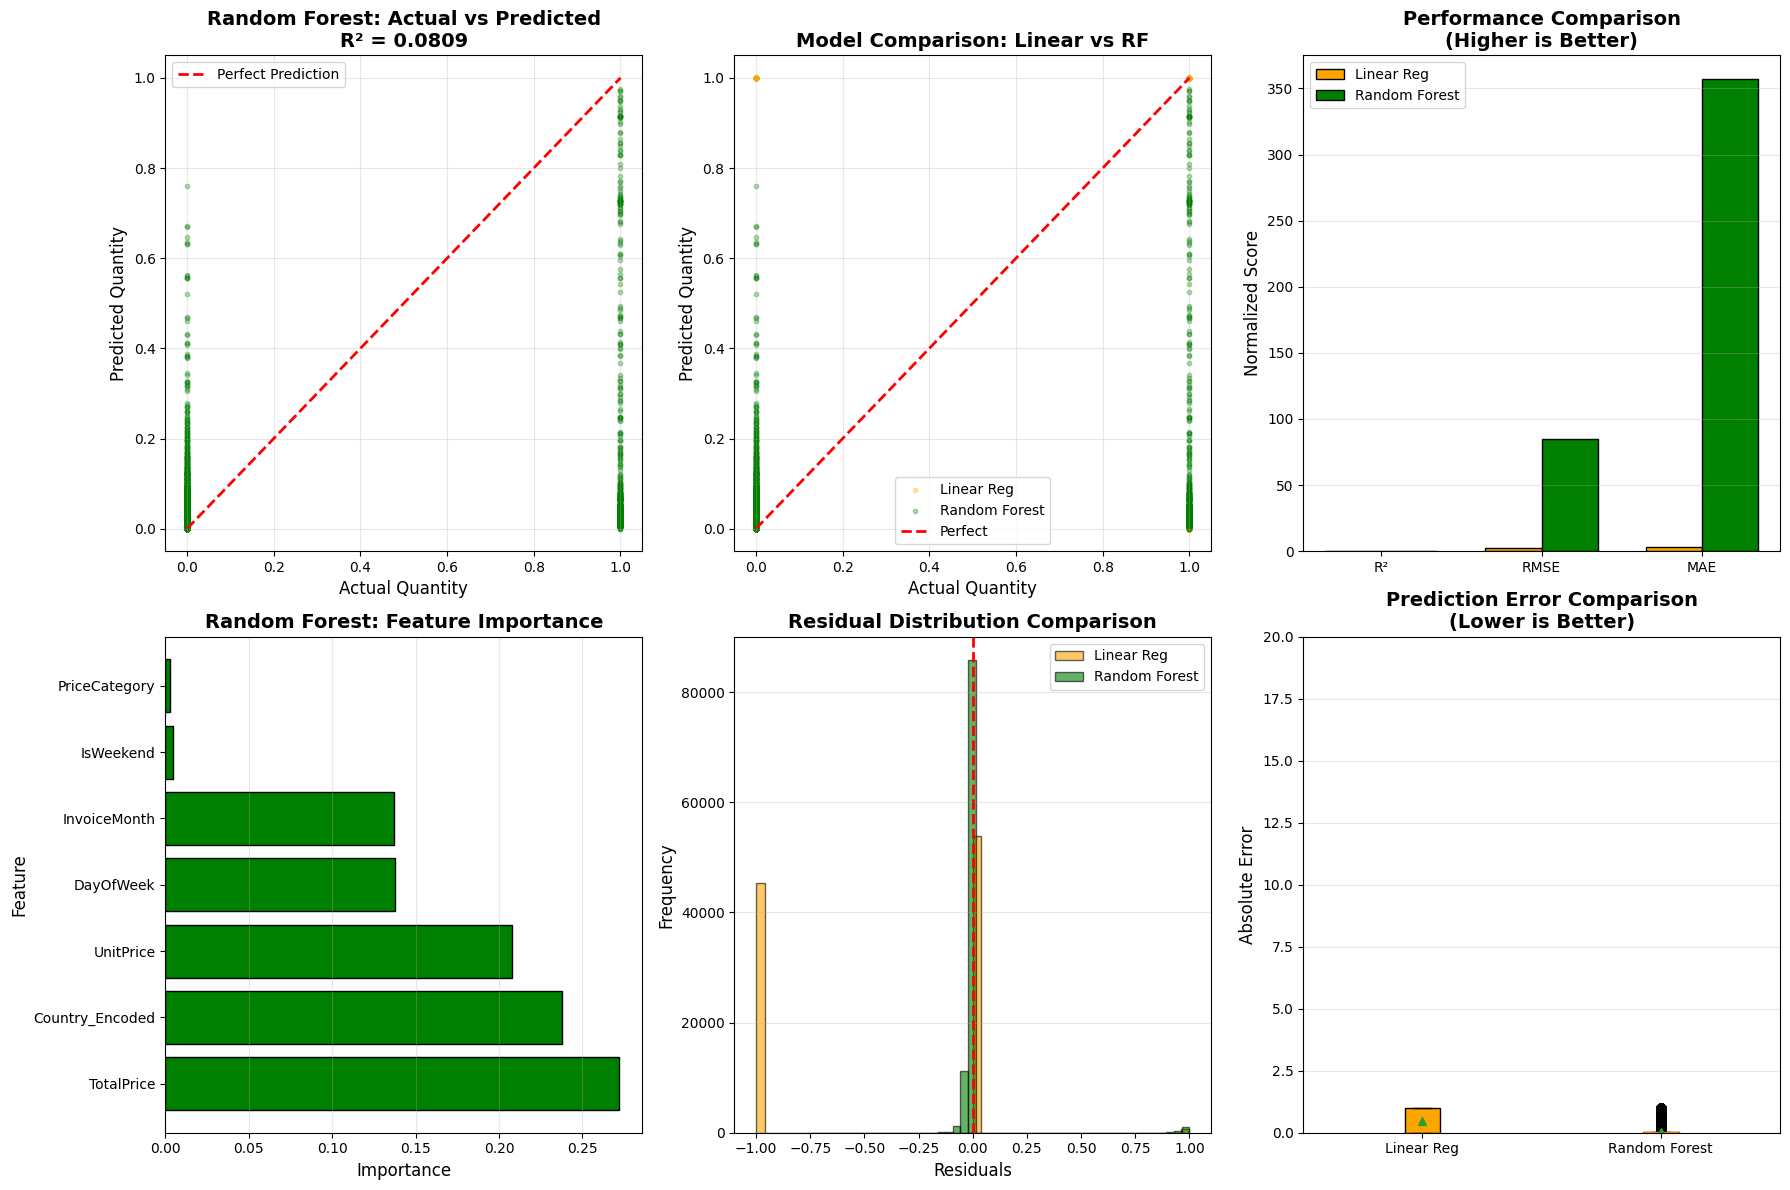


결론

1. 성능 개선:
   ○ 선형회귀가 더 나음 (데이터가 선형 관계일 가능성)

2. 주요 예측 변수 (Top 3):
   - TotalPrice: 0.2722
   - Country_Encoded: 0.2377
   - UnitPrice: 0.2078

3. 모델 선택 권장:
   → 선형회귀 사용 권장 (해석력이 더 좋고 단순함)

✅ 랜덤포레스트 분석 완료!


In [18]:
# 문제 4-2: 랜덤포레스트 회귀 (비교용)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

print("=" * 70)
print("문제 4-2: 랜덤포레스트 회귀 (Random Forest)")
print("=" * 70)

# 랜덤포레스트 모델 생성
# n_estimators: 트리 개수, max_depth: 트리 깊이, random_state: 재현성
rf_model = RandomForestRegressor(
    n_estimators=100,      # 100개의 트리 사용
    max_depth=10,          # 트리 깊이 제한 (과적합 방지)
    min_samples_split=10,  # 노드 분할 최소 샘플 수
    random_state=42,
    n_jobs=-1              # 모든 CPU 코어 사용
)

print("\n[학습 중...]")
# 스케일링 없이 원본 X 사용 (랜덤포레스트는 스케일에 민감하지 않음)
rf_model.fit(X_train, y_train)
print("✓ 모델 학습 완료!")

# 예측
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# 평가
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("\n[성능 평가]")
print("-" * 70)
print(f"훈련 데이터:")
print(f"  R² Score: {r2_train_rf:.4f}")
print(f"  RMSE: {rmse_train_rf:.2f}")
print(f"  MAE: {mae_train_rf:.2f}")

print(f"\n테스트 데이터:")
print(f"  R² Score: {r2_test_rf:.4f}")
print(f"  RMSE: {rmse_test_rf:.2f}")
print(f"  MAE: {mae_test_rf:.2f}")

# 선형회귀와 비교
print("\n[모델 비교: 선형회귀 vs 랜덤포레스트]")
print("-" * 70)
print(f"{'Metric':<15} {'Linear Reg (Test)':<20} {'Random Forest (Test)':<20} {'Winner':<10}")
print("-" * 70)

# R² 비교
if r2_test_rf > r2_test:
    r2_winner = "RF ✓"
else:
    r2_winner = "Linear ✓"
print(f"{'R²':<15} {r2_test:<20.4f} {r2_test_rf:<20.4f} {r2_winner:<10}")

# RMSE 비교 (낮을수록 좋음)
if rmse_test_rf < rmse_test:
    rmse_winner = "RF ✓"
else:
    rmse_winner = "Linear ✓"
print(f"{'RMSE':<15} {rmse_test:<20.2f} {rmse_test_rf:<20.2f} {rmse_winner:<10}")

# MAE 비교 (낮을수록 좋음)
if mae_test_rf < mae_test:
    mae_winner = "RF ✓"
else:
    mae_winner = "Linear ✓"
print(f"{'MAE':<15} {mae_test:<20.2f} {mae_test_rf:<20.2f} {mae_winner:<10}")

# 피처 중요도
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n[피처 중요도]")
print("-" * 70)
print(importance_df.to_string(index=False))

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 그래프 1: 실제값 vs 예측값 (랜덤포레스트)
axes[0, 0].scatter(y_test, y_test_pred_rf, alpha=0.3, s=10, color='green')
axes[0, 0].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Quantity', fontsize=12)
axes[0, 0].set_ylabel('Predicted Quantity', fontsize=12)
axes[0, 0].set_title(f'Random Forest: Actual vs Predicted\nR² = {r2_test_rf:.4f}',
                     fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 그래프 2: 선형회귀 vs 랜덤포레스트 비교
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.3, s=10, label='Linear Reg', color='orange')
axes[0, 1].scatter(y_test, y_test_pred_rf, alpha=0.3, s=10, label='Random Forest', color='green')
axes[0, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect')
axes[0, 1].set_xlabel('Actual Quantity', fontsize=12)
axes[0, 1].set_ylabel('Predicted Quantity', fontsize=12)
axes[0, 1].set_title('Model Comparison: Linear vs RF', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 그래프 3: 성능 지표 비교 막대그래프
metrics_names = ['R²', 'RMSE', 'MAE']
linear_scores = [r2_test, rmse_test, mae_test]
rf_scores = [r2_test_rf, rmse_test_rf, mae_test_rf]

# R²는 높을수록, RMSE/MAE는 낮을수록 좋으므로 정규화
# R²는 그대로, RMSE/MAE는 역수 취함
linear_normalized = [r2_test, 1/rmse_test*10, 1/mae_test*10]
rf_normalized = [r2_test_rf, 1/rmse_test_rf*10, 1/mae_test_rf*10]

x = np.arange(len(metrics_names))
width = 0.35

axes[0, 2].bar(x - width/2, linear_normalized, width, label='Linear Reg',
               color='orange', edgecolor='black')
axes[0, 2].bar(x + width/2, rf_normalized, width, label='Random Forest',
               color='green', edgecolor='black')
axes[0, 2].set_ylabel('Normalized Score', fontsize=12)
axes[0, 2].set_title('Performance Comparison\n(Higher is Better)',
                     fontsize=14, fontweight='bold')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(metrics_names)
axes[0, 2].legend()
axes[0, 2].grid(axis='y', alpha=0.3)

# 그래프 4: 피처 중요도 (랜덤포레스트)
axes[1, 0].barh(importance_df['Feature'], importance_df['Importance'],
                color='green', edgecolor='black')
axes[1, 0].set_xlabel('Importance', fontsize=12)
axes[1, 0].set_ylabel('Feature', fontsize=12)
axes[1, 0].set_title('Random Forest: Feature Importance', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 그래프 5: 잔차 분포 비교
residuals_linear = y_test - y_test_pred
residuals_rf = y_test - y_test_pred_rf

axes[1, 1].hist(residuals_linear, bins=50, alpha=0.6, label='Linear Reg',
                color='orange', edgecolor='black')
axes[1, 1].hist(residuals_rf, bins=50, alpha=0.6, label='Random Forest',
                color='green', edgecolor='black')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Residual Distribution Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# 그래프 6: 예측 오차의 절댓값 비교 (박스플롯)
abs_error_linear = np.abs(residuals_linear)
abs_error_rf = np.abs(residuals_rf)

bp = axes[1, 2].boxplot([abs_error_linear, abs_error_rf],
                        labels=['Linear Reg', 'Random Forest'],
                        patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('orange')
bp['boxes'][1].set_facecolor('green')

axes[1, 2].set_ylabel('Absolute Error', fontsize=12)
axes[1, 2].set_title('Prediction Error Comparison\n(Lower is Better)',
                     fontsize=14, fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)
axes[1, 2].set_ylim(0, 20)

plt.tight_layout()
plt.show()

# 결론
print("\n" + "=" * 70)
print("결론")
print("=" * 70)

print(f"\n1. 성능 개선:")
r2_improvement = ((r2_test_rf - r2_test) / r2_test) * 100
mae_improvement = ((mae_test - mae_test_rf) / mae_test) * 100

if r2_test_rf > r2_test:
    print(f"   ✓ 랜덤포레스트가 선형회귀보다 우수")
    print(f"   - R² 개선: {r2_improvement:+.2f}%")
    print(f"   - MAE 개선: {mae_improvement:+.2f}%")
else:
    print(f"   ○ 선형회귀가 더 나음 (데이터가 선형 관계일 가능성)")

print(f"\n2. 주요 예측 변수 (Top 3):")
for idx, row in importance_df.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print(f"\n3. 모델 선택 권장:")
if r2_test_rf > r2_test + 0.05:  # 5% 이상 개선
    print(f"   → 랜덤포레스트 사용 권장 (명확한 성능 향상)")
elif r2_test_rf > r2_test:
    print(f"   → 랜덤포레스트 약간 우수하나, 복잡도 고려하여 선택")
else:
    print(f"   → 선형회귀 사용 권장 (해석력이 더 좋고 단순함)")

print("\n✅ 랜덤포레스트 분석 완료!")

상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델


1. 모델 성능 평가 (R² 및 오차)
설명력 (R²Score): 훈련 세트 0.1286, 테스트 세트 0.1289로 매우 낮은 설명력을 보임. 독립변수(UnitPrice, Country_Encoded, DayOfWeek, InvoiceMonth)가 종속변수(Quantity) 변동의 약 12.9%만을 설명하며, 나머지 87.1%는 모델에 포함되지 않은 다른 요인이나 무작위 오차에 의한 것임을 의미

평균 절대 오차 (MAE): 테스트 세트에서 3.36개, 평균적으로 실제 판매 수량과 예측 판매 수량 간에 ±3.36개의 오차가 발생

결론: 이 모델은 판매 수량을 예측하는 데 적합하지 않음. 실제 판매를 예측하려면 더 많은 중요한 변수를 포함하거나 다른 유형의 모델을 고려

2. 회귀계수 및 변수 영향력 해석 (Regression Coefficients)

UnitPrice (단가): -0.656 → 단가(UnitPrice)가 1 증가할 때마다, 예측 판매 수량(Quantity)은 약 0.66개 감소, 즉 단가가 높을수록 구매 수량 감소

Country_Encoded (국가 인코딩): -0.158 → 국가별 차이가 존재, 국가 인코딩 값(Country_Encoded)이 1 증가할 때마다, 예측 판매 수량(Quantity)은 약 0.16개 감소

DayOfWeek (요일): -0.0357 → DayOfWeek 값이 1 증가할 때마다, 예측 판매 수량(Quantity)은 약 0.04개 감소, 요일 영향은 미미

InvoiceMonth (월): -0.0226 → InvoiceMonth 값이 1 증가할 때마다, 예측 판매 수량(Quantity)은 약 0.02개 감소, 가장 작은 영향력

변수 중요도순: 영향력은 UnitPrice > Country_Encoded > DayOfWeek > InvoiceMonth

3. 그래프 분석 (Visual Analysis)

3.1. 예측 대 실제 값 (Actual vs Predicted)
그래프 특징: 훈련/테스트 세트 모두에서 예측 값(Predicted Quantity)이 실제 값(Actual Quantity)에 비해 매우 낮은 범위(0-15 사이)에 집중

관찰: 데이터 포인트들이 빨간색 점선(Perfect Prediction) 주변에 밀집되어 있지 않고, 수직선처럼 y축에 평행하게 흩어져 있어 이는 모델이 실제 값의 변화를 거의 포착하지 못하고, 대부분의 예측을 일정 범위 내의 특정 값으로만 하고 있음

3.2. 잔차 분포 (Residual Distribution)
그래프 특징: 훈련/테스트 세트 모두 잔차(Residuals)의 분포가 정규 분포를 따르지 않고, 0 주변에 가장 많이 모여 있지만 오른쪽으로 긴 꼬리를 보임.

해석: 모델이 실제보다 과소 예측하는 경향이 있으며, 큰 오차가 양의 방향으로 더 자주 발생함. 정규분포 모양을 나타내지는 않음으로 이상적인 선형 회귀 모델이라고 말할 수 없음

3.3. 잔차 산점도 (Residual Plot) scatter
그래프 특징: 잔차(Residuals)가 예측 값(Predicted Quantity)에 대해 무작위로 흩어져 있지 않고, 음의 경향을 보이는 뚜렷한 패턴을 형성, 예측 수량(Predicted Quantity)이 증가할수록 잔차가 감소(음의 값)하는 경향

해석: 잔차에 패턴이 있다는 것은 선형 회귀 모델의 기본 가정(잔차의 독립성 및 무작위성)을 위반하며, 이는 모델이 추가적인 정보(비선형 관계, 다른 변수)를 포착하지 못했다고 말할수 있음

4. 종합 요약 및 조치
모델 부적합: R²점수(0.1289)와 그래프 분석(특히 잔차 산점도의 패턴)을 볼 때, 이 다중 선형 회귀 모델은 판매 수량(Quantity) 예측에 부적합함. 가장 큰 영향은 변수 중에서는 UnitPrice가 판매 수량에 가장 큰(음의) 영향을 미침

- 변수 추가: 판매 수량에 큰 영향을 미칠 수 있는 제품 속성(예: StockCode, Description), 고객 정보, 프로모션 여부 등 더 많은 변수를 포함해야 함

- 비선형 모델 고려: 잔차 산점도의 패턴으로 미루어 볼 때, 판매 수량과 독립 변수
간에 비선형적인 관계가 있을 수 있어 랜덤 포레스트(Random Forest)등의 같은 비선형 모델을 시도해보았으나, 선형회귀가 더 적합하다는 것이 결론

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

문제 5: 로지스틱 회귀 분석
반품 가능성(IsReturn) 예측

[단계 1] 데이터 준비 및 반품 피처 생성
----------------------------------------------------------------------
IsReturn 분포:
IsReturn
0    531285
1     10624
Name: count, dtype: int64

반품 비율: 1.96%
정상 거래 비율: 98.04%

결측치 확인:
UnitPrice            0
Country              0
CustomerID      135080
DayOfWeek            0
InvoiceMonth         0
dtype: int64

결측치 제거 후 데이터 크기: 541,909 rows
이상치 제거 후 데이터 크기: 499,767 rows

[단계 2] 피처 선정 및 엔지니어링
----------------------------------------------------------------------
선택된 피처: ['UnitPrice', 'TotalPrice', 'Country_Encoded', 'DayOfWeek', 'InvoiceMonth', 'IsWeekend', 'PriceCategory']

피처별 기초 통계:
           UnitPrice     TotalPrice  Country_Encoded      DayOfWeek  \
count  499767.000000  499767.000000    499767.000000  499767.000000   
mean        2.535198      18.986936        34.293257       2.444673   
std         1.914089     376.339067         6.164944       1.852489   
min         0.001000       0.001000         0.000000       0.0

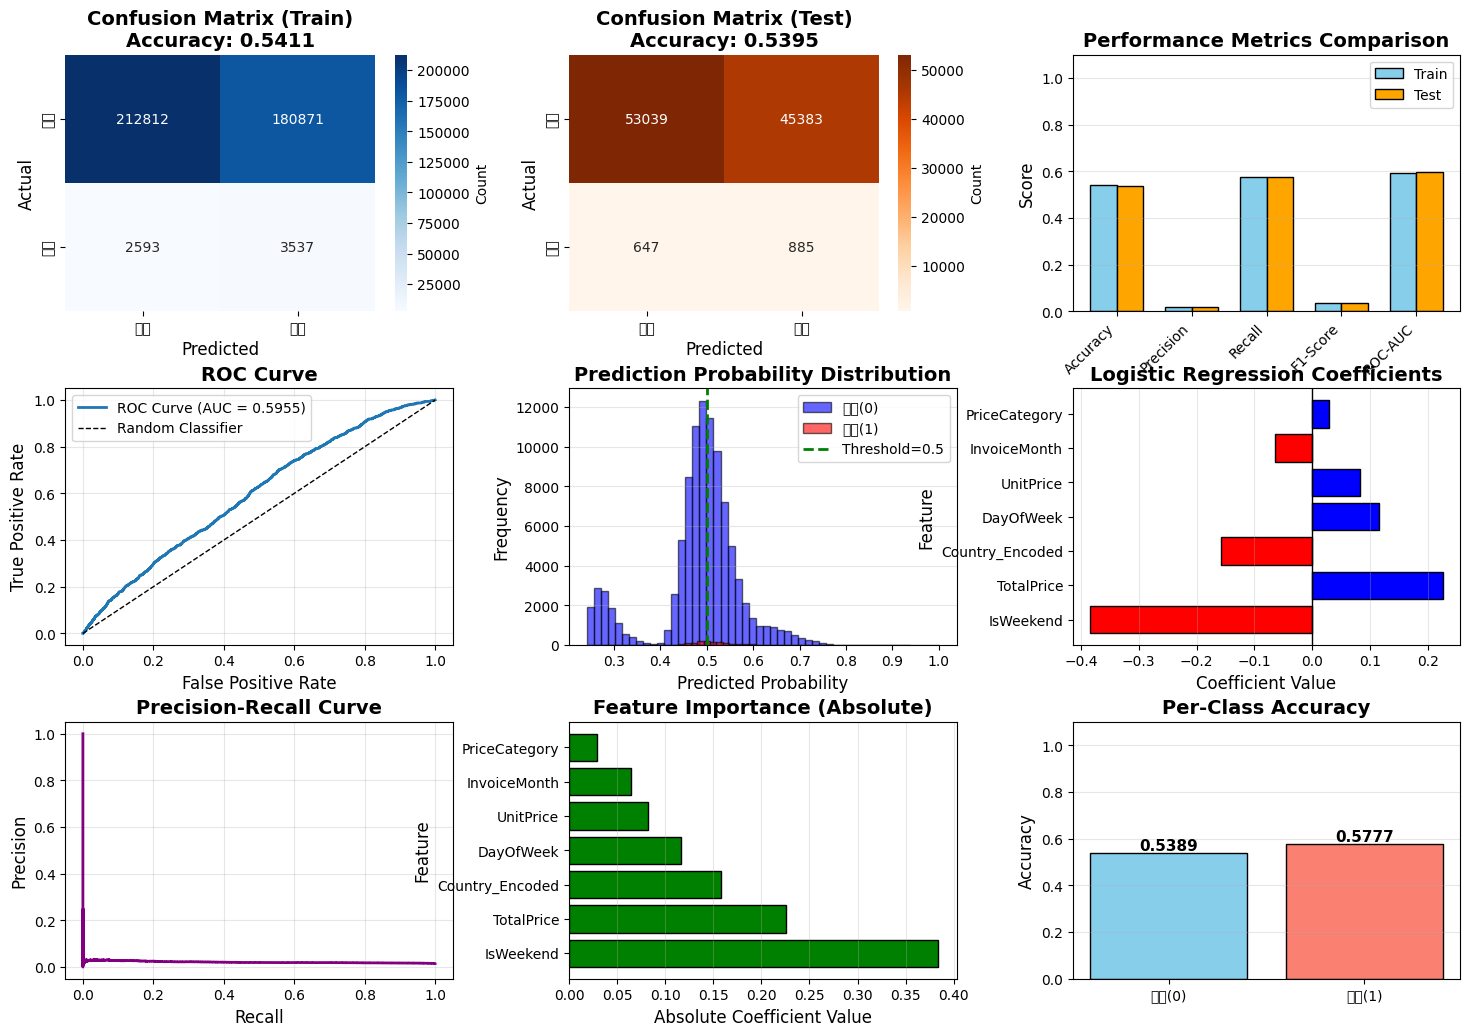


[단계 11] 모델 성능 개선 방안

1. 피처 엔지니어링:
   • 고객별 과거 반품 이력 추가
   • 상품 카테고리 정보 추가
   • 계절성 변수 추가 (월별 패턴)
   • 주문 시간대 정보 추가
   • 고객-상품 상호작용 피처

2. 클래스 불균형 처리:
   • SMOTE (Synthetic Minority Over-sampling)
   • 언더샘플링 (다수 클래스 줄이기)
   • 앙상블 기법 (Balanced Random Forest)
   • 현재 불균형 비율: 64.2:1

3. 임계값 조정:
   • 기본 임계값 0.5 대신 최적 임계값 찾기
   • 비즈니스 목표에 따라 조정
   • 예: 반품 탐지 중시 → 낮은 임계값 (재현율 ↑)
   • 예: 오탐 최소화 중시 → 높은 임계값 (정밀도 ↑)

4. 다른 모델 시도:
   • Random Forest (비선형 관계 포착)
   • XGBoost, LightGBM (고성능 부스팅)
   • Neural Network (복잡한 패턴)

5. 하이퍼파라미터 튜닝:
   • C (규제 강도) 조정
   • penalty ('l1', 'l2') 선택
   • solver 변경
   • GridSearchCV 또는 RandomizedSearchCV 사용

6. 교차 검증:
   • K-Fold Cross Validation
   • Stratified K-Fold (클래스 비율 유지)
   • 과적합 방지 및 일반화 성능 향상

[추가] 임계값 최적화 예시
----------------------------------------------------------------------
기본 임계값 0.5의 F1-Score: 0.0370
최적 임계값 0.60의 F1-Score: 0.0439
개선: +0.0069

최적 임계값 0.60 적용 시:
  Precision: 0.0272 (기존: 0.0191)
  Recall:    0.1136 (기존: 0.5777)
  F1-Score:  0.043

In [17]:
# 문제 5: 로지스틱 회귀 분석 - 반품 예측

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, classification_report,
                              accuracy_score, precision_score, recall_score,
                              f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("문제 5: 로지스틱 회귀 분석")
print("반품 가능성(IsReturn) 예측")
print("=" * 70)

# 5-1. 데이터 준비 및 정제
print("\n[단계 1] 데이터 준비 및 반품 피처 생성")
print("-" * 70)

# 로지스틱 회귀용 데이터프레임 생성
df_logit = df.copy()

# IsReturn 피처 생성
# Quantity가 음수이면 반품(1), 양수이면 정상(0)
df_logit['IsReturn'] = (df_logit['Quantity'] < 0).astype(int)

print(f"IsReturn 분포:")
print(df_logit['IsReturn'].value_counts())
print(f"\n반품 비율: {df_logit['IsReturn'].mean()*100:.2f}%")
print(f"정상 거래 비율: {(1-df_logit['IsReturn'].mean())*100:.2f}%")

# 결측치 제거
print(f"\n결측치 확인:")
print(df_logit[['UnitPrice', 'Country', 'CustomerID', 'DayOfWeek', 'InvoiceMonth']].isnull().sum())

# CustomerID는 결측치가 많으므로 제외하고 진행
df_logit = df_logit.dropna(subset=['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth'])

print(f"\n결측치 제거 후 데이터 크기: {len(df_logit):,} rows")

# 이상치 제거: UnitPrice가 0 이하인 경우 제거
df_logit = df_logit[df_logit['UnitPrice'] > 0]

# UnitPrice 극단값 제거
Q1_price = df_logit['UnitPrice'].quantile(0.25)
Q3_price = df_logit['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
df_logit = df_logit[(df_logit['UnitPrice'] >= Q1_price - 1.5*IQR_price) &
                    (df_logit['UnitPrice'] <= Q3_price + 1.5*IQR_price)]

print(f"이상치 제거 후 데이터 크기: {len(df_logit):,} rows")

# 5-2. 피처 선정 및 생성
print("\n[단계 2] 피처 선정 및 엔지니어링")
print("-" * 70)

# 추가 피처 생성
# TotalPrice: 거래 총액
df_logit['TotalPrice'] = df_logit['Quantity'].abs() * df_logit['UnitPrice']

# IsWeekend: 주말 여부
df_logit['IsWeekend'] = df_logit['DayOfWeek'].isin([5, 6]).astype(int)

# PriceCategory: 가격 구간 (저가/중가/고가)
price_33 = df_logit['UnitPrice'].quantile(0.33)
price_67 = df_logit['UnitPrice'].quantile(0.67)
df_logit['PriceCategory'] = pd.cut(df_logit['UnitPrice'],
                                     bins=[0, price_33, price_67, np.inf],
                                     labels=[0, 1, 2])  # 0:저가, 1:중가, 2:고가

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
df_logit['Country_Encoded'] = label_encoder.fit_transform(df_logit['Country'])

# 선택할 피처들
feature_columns = ['UnitPrice', 'TotalPrice', 'Country_Encoded',
                   'DayOfWeek', 'InvoiceMonth', 'IsWeekend', 'PriceCategory']

print(f"선택된 피처: {feature_columns}")
print(f"\n피처별 기초 통계:")
print(df_logit[feature_columns].describe())

# 5-3. 변수 설정
print("\n[단계 3] 독립변수/종속변수 설정")
print("-" * 70)

X = df_logit[feature_columns]
y = df_logit['IsReturn']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\n클래스 불균형:")
print(f"  정상 거래 (0): {(y==0).sum():,} ({(y==0).mean()*100:.2f}%)")
print(f"  반품 (1): {(y==1).sum():,} ({(y==1).mean()*100:.2f}%)")

# 클래스 불균형 처리 방법 안내
imbalance_ratio = (y==0).sum() / (y==1).sum()
print(f"\n불균형 비율: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 10:
    print("⚠ 심한 클래스 불균형 발생!")
    print("→ class_weight='balanced' 옵션 사용 예정")

# 5-4. 데이터 분할
print("\n[단계 4] 훈련/테스트 데이터 분할")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify: 클래스 비율 유지
)

print(f"훈련 데이터: {X_train.shape[0]:,} samples")
print(f"  - 정상: {(y_train==0).sum():,} ({(y_train==0).mean()*100:.2f}%)")
print(f"  - 반품: {(y_train==1).sum():,} ({(y_train==1).mean()*100:.2f}%)")

print(f"\n테스트 데이터: {X_test.shape[0]:,} samples")
print(f"  - 정상: {(y_test==0).sum():,} ({(y_test==0).mean()*100:.2f}%)")
print(f"  - 반품: {(y_test==1).sum():,} ({(y_test==1).mean()*100:.2f}%)")

# 5-5. 피처 스케일링 (표준화)
print("\n[단계 5] 피처 스케일링")
print("-" * 70)

# 로지스틱 회귀는 스케일에 민감하므로 표준화 필요
# 표준화: (x - 평균) / 표준편차 → 평균 0, 표준편차 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ 피처 스케일링 완료 (StandardScaler)")
print(f"스케일링 전 UnitPrice 범위: {X_train['UnitPrice'].min():.2f} ~ {X_train['UnitPrice'].max():.2f}")
print(f"스케일링 후 UnitPrice 범위: {X_train_scaled[:, 0].min():.2f} ~ {X_train_scaled[:, 0].max():.2f}")

# 5-6. 로지스틱 회귀 모델 학습
print("\n[단계 6] 로지스틱 회귀 모델 학습")
print("-" * 70)

# 기본 모델 (class_weight='balanced': 클래스 불균형 자동 조정)
model_logit = LogisticRegression(
    class_weight='balanced',  # 클래스 불균형 처리
    max_iter=1000,  # 최대 반복 횟수
    random_state=42
)

model_logit.fit(X_train_scaled, y_train)

print("✓ 모델 학습 완료!")

# 5-7. 예측
print("\n[단계 7] 예측 수행")
print("-" * 70)

# 클래스 예측 (0 or 1)
y_train_pred = model_logit.predict(X_train_scaled)
y_test_pred = model_logit.predict(X_test_scaled)

# 확률 예측 (0~1 사이의 확률값)
y_train_proba = model_logit.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model_logit.predict_proba(X_test_scaled)[:, 1]

print(f"예측 완료!")
print(f"  훈련 데이터: {len(y_train_pred):,} predictions")
print(f"  테스트 데이터: {len(y_test_pred):,} predictions")

# 5-8. 모델 평가
print("\n[단계 8] 모델 성능 평가")
print("=" * 70)

# 8-1. 기본 평가 지표
print("\n[8-1] 기본 평가 지표")
print("-" * 70)

# 정확도 (Accuracy)
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# 정밀도 (Precision): 반품으로 예측한 것 중 실제 반품 비율
prec_train = precision_score(y_train, y_train_pred)
prec_test = precision_score(y_test, y_test_pred)

# 재현율 (Recall): 실제 반품 중 반품으로 예측한 비율
rec_train = recall_score(y_train, y_train_pred)
rec_test = recall_score(y_test, y_test_pred)

# F1 Score: 정밀도와 재현율의 조화평균
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

# ROC-AUC: 분류 성능의 종합 지표 (0.5~1, 높을수록 좋음)
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"훈련 데이터 성능:")
print(f"  Accuracy:  {acc_train:.4f}")
print(f"  Precision: {prec_train:.4f}")
print(f"  Recall:    {rec_train:.4f}")
print(f"  F1-Score:  {f1_train:.4f}")
print(f"  ROC-AUC:   {auc_train:.4f}")

print(f"\n테스트 데이터 성능:")
print(f"  Accuracy:  {acc_test:.4f}")
print(f"  Precision: {prec_test:.4f}")
print(f"  Recall:    {rec_test:.4f}")
print(f"  F1-Score:  {f1_test:.4f}")
print(f"  ROC-AUC:   {auc_test:.4f}")

# 8-2. 혼동행렬 (Confusion Matrix)
print("\n[8-2] 혼동행렬")
print("-" * 70)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("테스트 데이터 혼동행렬:")
print(f"\n                 예측: 정상    예측: 반품")
print(f"실제: 정상(0)    {cm_test[0,0]:>8,}    {cm_test[0,1]:>8,}   (TN, FP)")
print(f"실제: 반품(1)    {cm_test[1,0]:>8,}    {cm_test[1,1]:>8,}   (FN, TP)")

# 혼동행렬 구성 요소
TN, FP, FN, TP = cm_test[0,0], cm_test[0,1], cm_test[1,0], cm_test[1,1]

print(f"\n혼동행렬 해석:")
print(f"  TN (True Negative):  {TN:,} - 정상을 정상으로 맞춤 ✓")
print(f"  FP (False Positive): {FP:,} - 정상을 반품으로 오분류 ✗")
print(f"  FN (False Negative): {FN:,} - 반품을 정상으로 오분류 ✗")
print(f"  TP (True Positive):  {TP:,} - 반품을 반품으로 맞춤 ✓")

# 8-3. 분류 리포트
print("\n[8-3] 상세 분류 리포트")
print("-" * 70)

print("\n테스트 데이터 Classification Report:")
print(classification_report(y_test, y_test_pred,
                          target_names=['정상(0)', '반품(1)']))

# 8-4. 평가 지표 해석
print("\n[8-4] 평가 지표 상세 해석")
print("-" * 70)

print(f"\n1. Accuracy (정확도): {acc_test:.4f}")
print(f"   - 전체 중 맞게 예측한 비율")
print(f"   - (TP + TN) / (TP + TN + FP + FN)")
print(f"   - {(TP+TN):,} / {(TP+TN+FP+FN):,} = {acc_test:.4f}")
if acc_test > 0.9:
    print(f"   ✓ 매우 높은 정확도")
elif acc_test > 0.8:
    print(f"   ✓ 높은 정확도")
else:
    print(f"   ⚠ 개선 필요")

print(f"\n2. Precision (정밀도): {prec_test:.4f}")
print(f"   - 반품으로 예측한 것 중 실제 반품인 비율")
print(f"   - TP / (TP + FP)")
print(f"   - {TP:,} / {(TP+FP):,} = {prec_test:.4f}")
print(f"   - 반품 처리 비용 관련: 정밀도가 낮으면 불필요한 반품 처리 증가")

print(f"\n3. Recall (재현율): {rec_test:.4f}")
print(f"   - 실제 반품 중 반품으로 예측한 비율")
print(f"   - TP / (TP + FN)")
print(f"   - {TP:,} / {(TP+FN):,} = {rec_test:.4f}")
print(f"   - 반품 탐지 능력: 재현율이 낮으면 반품을 놓침")

print(f"\n4. F1-Score: {f1_test:.4f}")
print(f"   - 정밀도와 재현율의 조화평균")
print(f"   - 2 × (Precision × Recall) / (Precision + Recall)")
print(f"   - 불균형 데이터에서 더 의미있는 지표")

print(f"\n5. ROC-AUC: {auc_test:.4f}")
print(f"   - 0.5~1.0 범위 (0.5는 랜덤, 1.0은 완벽)")
if auc_test > 0.9:
    print(f"   ✓ 우수한 분류 성능")
elif auc_test > 0.8:
    print(f"   ✓ 좋은 분류 성능")
elif auc_test > 0.7:
    print(f"   ○ 괜찮은 분류 성능")
else:
    print(f"   ⚠ 개선 필요")

# 5-9. 회귀계수 분석
print("\n[단계 9] 회귀계수 분석")
print("-" * 70)

# 로지스틱 회귀 계수
coefficients = model_logit.coef_[0]
intercept = model_logit.intercept_[0]

coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n회귀계수 (로그 오즈 비):")
print(coef_df.to_string(index=False))

print(f"\n계수 해석:")
for idx, row in coef_df.head(5).iterrows():
    feat = row['Feature']
    coef = row['Coefficient']
    odds_ratio = np.exp(coef)

    if coef > 0:
        print(f"• {feat}: +{coef:.4f} (Odds Ratio: {odds_ratio:.4f})")
        print(f"  → {feat}이 증가하면 반품 확률 증가")
    else:
        print(f"• {feat}: {coef:.4f} (Odds Ratio: {odds_ratio:.4f})")
        print(f"  → {feat}이 증가하면 반품 확률 감소")

# 5-10. 시각화
print("\n[단계 10] 시각화")
print("-" * 70)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 그래프 1: 혼동행렬 히트맵 (훈련)
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['정상', '반품'], yticklabels=['정상', '반품'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_title(f'Confusion Matrix (Train)\nAccuracy: {acc_train:.4f}',
              fontsize=14, fontweight='bold')

# 그래프 2: 혼동행렬 히트맵 (테스트)
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['정상', '반품'], yticklabels=['정상', '반품'],
            ax=ax2, cbar_kws={'label': 'Count'})
ax2.set_xlabel('Predicted', fontsize=12)
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_title(f'Confusion Matrix (Test)\nAccuracy: {acc_test:.4f}',
              fontsize=14, fontweight='bold')

# 그래프 3: 평가 지표 비교
ax3 = fig.add_subplot(gs[0, 2])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_scores = [acc_train, prec_train, rec_train, f1_train, auc_train]
test_scores = [acc_test, prec_test, rec_test, f1_test, auc_test]

x = np.arange(len(metrics))
width = 0.35

ax3.bar(x - width/2, train_scores, width, label='Train', color='skyblue', edgecolor='black')
ax3.bar(x + width/2, test_scores, width, label='Test', color='orange', edgecolor='black')
ax3.set_ylabel('Score', fontsize=12)
ax3.set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics, rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 1.1)
ax3.grid(axis='y', alpha=0.3)

# 그래프 4: ROC 곡선
ax4 = fig.add_subplot(gs[1, 0])
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
ax4.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_test:.4f})')
ax4.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
ax4.set_xlabel('False Positive Rate', fontsize=12)
ax4.set_ylabel('True Positive Rate', fontsize=12)
ax4.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

# 그래프 5: 예측 확률 분포
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(y_test_proba[y_test==0], bins=50, alpha=0.6, label='정상(0)', color='blue', edgecolor='black')
ax5.hist(y_test_proba[y_test==1], bins=50, alpha=0.6, label='반품(1)', color='red', edgecolor='black')
ax5.axvline(0.5, color='green', linestyle='--', linewidth=2, label='Threshold=0.5')
ax5.set_xlabel('Predicted Probability', fontsize=12)
ax5.set_ylabel('Frequency', fontsize=12)
ax5.set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

# 그래프 6: 회귀계수 막대그래프
ax6 = fig.add_subplot(gs[1, 2])
colors = ['red' if x < 0 else 'blue' for x in coef_df['Coefficient']]
ax6.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, edgecolor='black')
ax6.axvline(0, color='black', linewidth=1)
ax6.set_xlabel('Coefficient Value', fontsize=12)
ax6.set_ylabel('Feature', fontsize=12)
ax6.set_title('Logistic Regression Coefficients', fontsize=14, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

# 그래프 7: Precision-Recall 곡선
ax7 = fig.add_subplot(gs[2, 0])
from sklearn.metrics import precision_recall_curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_test_proba)
ax7.plot(recall_curve, precision_curve, linewidth=2, color='purple')
ax7.set_xlabel('Recall', fontsize=12)
ax7.set_ylabel('Precision', fontsize=12)
ax7.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax7.grid(alpha=0.3)

# 그래프 8: 피처 중요도 (절댓값)
ax8 = fig.add_subplot(gs[2, 1])
ax8.barh(coef_df['Feature'], coef_df['Abs_Coefficient'], color='green', edgecolor='black')
ax8.set_xlabel('Absolute Coefficient Value', fontsize=12)
ax8.set_ylabel('Feature', fontsize=12)
ax8.set_title('Feature Importance (Absolute)', fontsize=14, fontweight='bold')
ax8.grid(axis='x', alpha=0.3)

# 그래프 9: 클래스별 정확도
ax9 = fig.add_subplot(gs[2, 2])
class_accuracy = [TN/(TN+FP), TP/(TP+FN)]
class_labels = ['정상(0)', '반품(1)']
bars = ax9.bar(class_labels, class_accuracy, color=['skyblue', 'salmon'], edgecolor='black')
ax9.set_ylabel('Accuracy', fontsize=12)
ax9.set_title('Per-Class Accuracy', fontsize=14, fontweight='bold')
ax9.set_ylim(0, 1.1)
ax9.grid(axis='y', alpha=0.3)

# 막대 위에 수치 표시
for bar, acc in zip(bars, class_accuracy):
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# 5-11. 모델 성능 개선 방안
print("\n[단계 11] 모델 성능 개선 방안")
print("=" * 70)

print("\n1. 피처 엔지니어링:")
print("   • 고객별 과거 반품 이력 추가")
print("   • 상품 카테고리 정보 추가")
print("   • 계절성 변수 추가 (월별 패턴)")
print("   • 주문 시간대 정보 추가")
print("   • 고객-상품 상호작용 피처")

print("\n2. 클래스 불균형 처리:")
print("   • SMOTE (Synthetic Minority Over-sampling)")
print("   • 언더샘플링 (다수 클래스 줄이기)")
print("   • 앙상블 기법 (Balanced Random Forest)")
print(f"   • 현재 불균형 비율: {imbalance_ratio:.1f}:1")

print("\n3. 임계값 조정:")
print("   • 기본 임계값 0.5 대신 최적 임계값 찾기")
print("   • 비즈니스 목표에 따라 조정")
print("   • 예: 반품 탐지 중시 → 낮은 임계값 (재현율 ↑)")
print("   • 예: 오탐 최소화 중시 → 높은 임계값 (정밀도 ↑)")

print("\n4. 다른 모델 시도:")
print("   • Random Forest (비선형 관계 포착)")
print("   • XGBoost, LightGBM (고성능 부스팅)")
print("   • Neural Network (복잡한 패턴)")

print("\n5. 하이퍼파라미터 튜닝:")
print("   • C (규제 강도) 조정")
print("   • penalty ('l1', 'l2') 선택")
print("   • solver 변경")
print("   • GridSearchCV 또는 RandomizedSearchCV 사용")

print("\n6. 교차 검증:")
print("   • K-Fold Cross Validation")
print("   • Stratified K-Fold (클래스 비율 유지)")
print("   • 과적합 방지 및 일반화 성능 향상")

# 간단한 임계값 최적화 예시
print("\n[추가] 임계값 최적화 예시")
print("-" * 70)

# F1-Score 최대화하는 임계값 찾기
best_threshold = 0.5
best_f1 = f1_test

for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_adjusted = (y_test_proba >= threshold).astype(int)
    f1_adjusted = f1_score(y_test, y_pred_adjusted)

    if f1_adjusted > best_f1:
        best_f1 = f1_adjusted
        best_threshold = threshold

print(f"기본 임계값 0.5의 F1-Score: {f1_test:.4f}")
print(f"최적 임계값 {best_threshold:.2f}의 F1-Score: {best_f1:.4f}")
print(f"개선: +{(best_f1 - f1_test):.4f}")

# 최적 임계값으로 재평가
y_test_pred_optimized = (y_test_proba >= best_threshold).astype(int)
prec_opt = precision_score(y_test, y_test_pred_optimized)
rec_opt = recall_score(y_test, y_test_pred_optimized)
f1_opt = f1_score(y_test, y_test_pred_optimized)

print(f"\n최적 임계값 {best_threshold:.2f} 적용 시:")
print(f"  Precision: {prec_opt:.4f} (기존: {prec_test:.4f})")
print(f"  Recall:    {rec_opt:.4f} (기존: {rec_test:.4f})")
print(f"  F1-Score:  {f1_opt:.4f} (기존: {f1_test:.4f})")

# 5-12. 결과 요약
print("\n" + "=" * 70)
print("최종 결과 요약")
print("=" * 70)

print(f"\n1. 데이터:")
print(f"   - 총 {len(df_logit):,}개의 거래 분석")
print(f"   - 반품 비율: {df_logit['IsReturn'].mean()*100:.2f}%")
print(f"   - 클래스 불균형 비율: {imbalance_ratio:.1f}:1")

print(f"\n2. 모델 성능 (테스트셋):")
print(f"   - Accuracy:  {acc_test:.4f}")
print(f"   - Precision: {prec_test:.4f}")
print(f"   - Recall:    {rec_test:.4f}")
print(f"   - F1-Score:  {f1_test:.4f}")
print(f"   - ROC-AUC:   {auc_test:.4f}")

print(f"\n3. 주요 반품 예측 인자 (Top 3):")
for i, row in coef_df.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Coefficient']:.4f}")

print(f"\n4. 비즈니스 인사이트:")
if rec_test > 0.7:
    print(f"   ✓ 반품의 {rec_test*100:.1f}%를 사전에 탐지 가능")
else:
    print(f"   ⚠ 반품 탐지율 개선 필요 (현재 {rec_test*100:.1f}%)")

if prec_test > 0.5:
    print(f"   ✓ 반품 예측의 {prec_test*100:.1f}%가 정확")
else:
    print(f"   ⚠ 오탐이 많음 (정밀도 {prec_test*100:.1f}%)")

print(f"\n5. 개선 권장사항:")
if f1_test < 0.5:
    print(f"   ⚠ 모델 성능이 낮음 (F1={f1_test:.4f})")
    print(f"   → 피처 추가, 다른 모델 시도, 샘플링 기법 적용 권장")
elif f1_test < 0.7:
    print(f"   ○ 모델 성능이 보통 (F1={f1_test:.4f})")
    print(f"   → 하이퍼파라미터 튜닝 및 피처 엔지니어링 권장")
else:
    print(f"   ✓ 모델 성능이 우수 (F1={f1_test:.4f})")
    print(f"   → 교차 검증으로 안정성 확인 권장")

print("\n✅ 분석 완료!")
print("=" * 70)


로지스틱 회귀 분석 결과 해석 (반품 가능성 예측)

1. 모델 성능 요약 및 불균형 데이터 문제 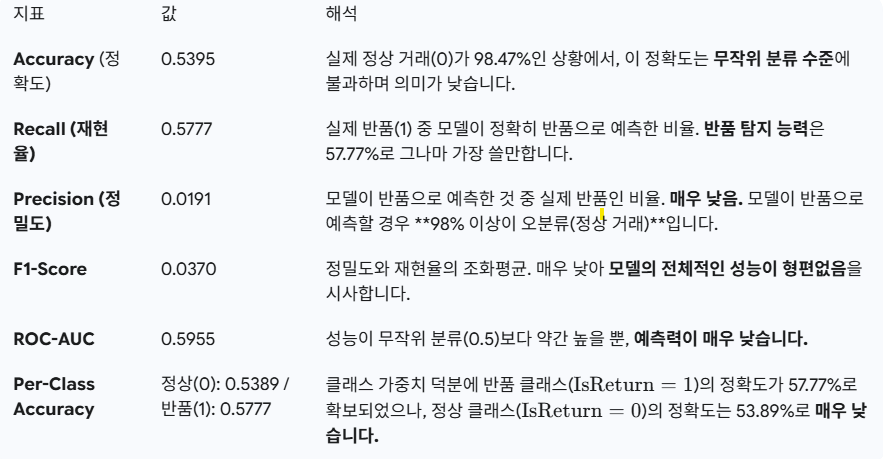

결론:class_weight='balanced' 옵션으로 인해 재현율(Recall)은 어느 정도 확보되었으나, **정밀도(Precision)와 전체 예측력textAUC은 매우 낮음. 이 모델은 반품이 아닌 정상 거래를 반품으로 오분류하는(False Positive) 경우가 압도적으로 많아 실제 서비스에 적용하기 어려움이 있음.

2. 혼동 행렬 및 오분류 분석
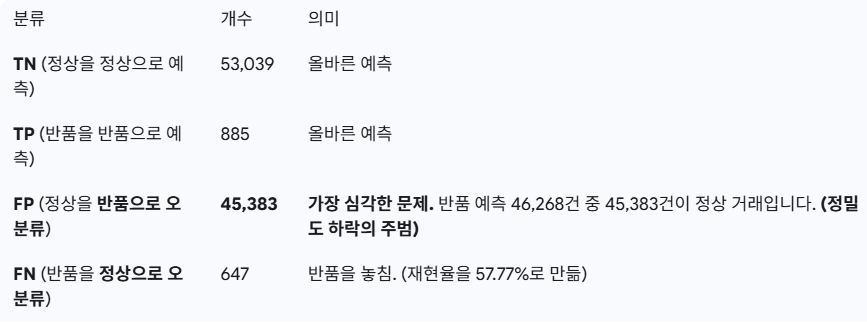

결론 : 모델은 정상 거래를 반품으로 판단하는 오류(FP)가 45,383건으로, 실제 반품(1,532건) 보다 훨씬 많음. 이는 반품이 아닌 고객에게 불필요하게 반품 관련 처리를 시도할 수 있음을 의미하며, 매우 높은 비용을 유발할 수 있음

3. 회귀계수 및 변수 중요도 분석 (로그 오즈 비)

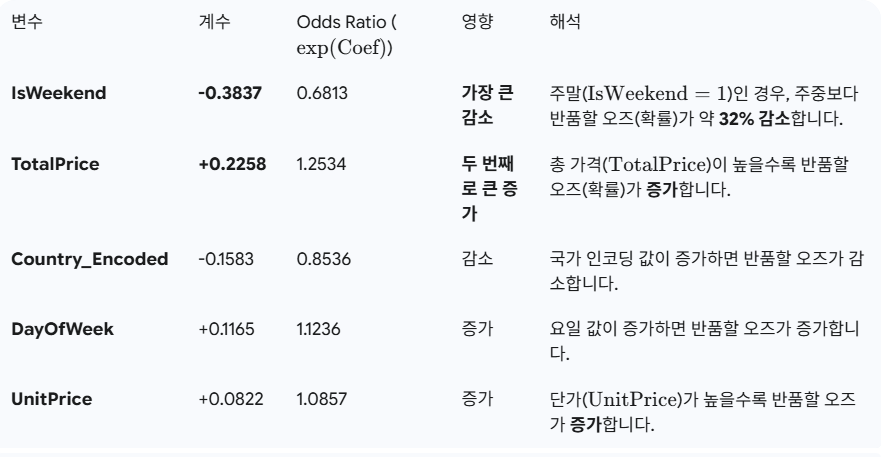

결론 : 변수 중요도 (절대값):IsWeekend > TotalPrice > Country_Encoded > DayOfWeek> UnitPrice

주요 인사이트: 주말에는 반품할 확률이 현저히 낮고, 총가격과 단가가 높을수록 반품할 확률이 높아짐.


4. 그래프 시각적 분석
ROC Curve (AUC=0.5955): 곡선이 Random Classifier (AUC=0.5) 대각선에 매우 가까워 이는 모델의 분류 능력이 무작위 추측 수준에서 크게 벗어나지 못했음을 확인

Precision-Recall Curve: 곡선이 Recall이 0일 때를 제외하고 y축 하단에 붙어 있어, 이는 Recall이 증가할 때 Precision이 급격히 낮아져F1-Score가 낮은 이유를 시각적으로 보여줌

Prediction Probability Distribution: IsReturn=0 (정상 거래)과 IsReturn=1 (반품)의 예측 확률 분포가 Threshold=0.5 근처에서 크게 겹쳐있음. 특히, 정상 거래(파란색) 데이터의 상당수가 0.5 이상으로 예측되어 IsReturn=1로 잘못 분류되고 있어 이것이 대량의 False Positive(FP)를 발생시킨 주원인

5. 결론
로지스틱 회귀 모델은 클래스 불균형에 대응하기 위해 가중치를 사용했음에도 불구하고, 반품 예측에 필요한 충분한 변별력을 확보하지 못했음.
모델 부적합: AUC≈0.60으로 예측력이 낮고, Precision이 0.02 미만으로 실용성이 없음.

개선 방안:
- 임계값(Threshold) 조정: 현재 0.5 임계값은 FP를 과도하게 만들기 때문에 Precision-Recall 트레이드오프를 고려하여 임계값을 0.5보다 훨씬 높게 설정해야 FP를 줄이고 Precision을 높일 수 있음.

- 고급 모델 사용: 데이터의 복잡한 비선형 패턴을 학습하기 위해 결정 트리(Decision Tree), 랜덤 포레스트(Random Forest) 또는 XGBoost와 같은 앙상블 모델을 시도

In [19]:
# 회고
# 이번 프로젝트를 통해 통계 분석의 핵심 개념들을 실전에 적용해볼 수 있었다.
# 모집단과 표본의 관계, 중심극한정리의 실제 작동 원리, 독립표본 t-검정을 통한 가설 검증, 다중 선형 회귀와 로지스틱 회귀의 차이와 활용법 등 이론으로만 알던 개념들이 실제 데이터에서
# 어떻게 구현되는지 이해할 수 있었다. 특히 데이터 전처리(결측치, 이상치 처리), 피처 엔지니어링, 모델 평가 지표(R², 혼동행렬, Precision/Recall)를 사용해봤으며,
# 프로젝트 진행 중 이해가 부족한 부분은 Claude, ChatGPT, Gemini 세 가지 AI를 모두 활용하여 다양한 관점에서 학습하고 보완 (사실 전적으로 의지...)할 수 있었다.


